In [1]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
building_id     260601 non-null int64
damage_grade    260601 non-null int64
dtypes: int64(2)
memory usage: 4.0 MB


In [3]:
data = pd.read_csv('../data/earthquake/train_values.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
#here we combine the data and labels together to get 1 dataframe to work with

combined_data = pd.merge(data, labels, on='building_id')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [5]:
# The 40th column is the damage_grade
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
# Here we take out only the age from the combined datafram to see the distribution of the age across all the buildings affected

ageData=combined_data['age']

# <font color='mediumblue'>1st assumption: Maybe age of the building may have an impact on the damage grade?</font>

### Distibution of the age of the buildings

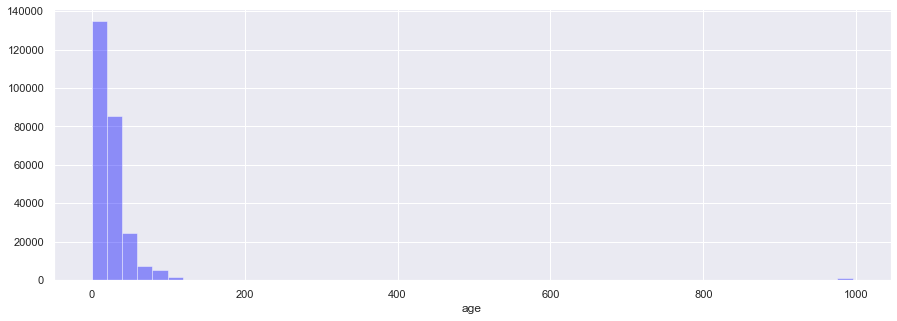

In [7]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))
sb.distplot(ageData, kde = False, color = "blue")

#### It can be seen that the most of the building's age is in range of 0 to 100



### Distribution of the damage levels

In [8]:
print("Number of Damage Levels :", len(combined_data["damage_grade"].unique()))
print(combined_data["damage_grade"].value_counts())

Number of Damage Levels : 3
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


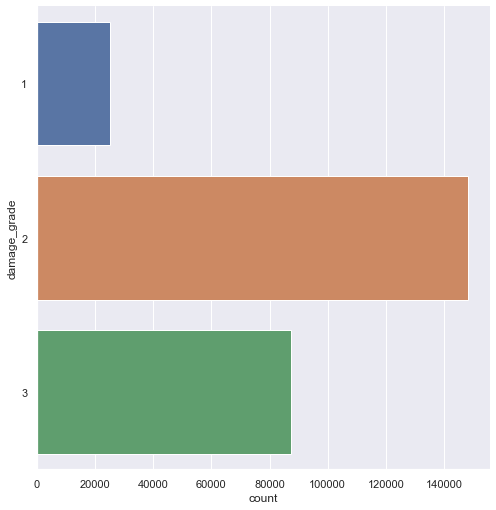

In [9]:
sb.catplot(y = "damage_grade", data = combined_data, kind = "count",height=7)

#### It can be seen most building has a damage level of 2

## Plotting damage vs age

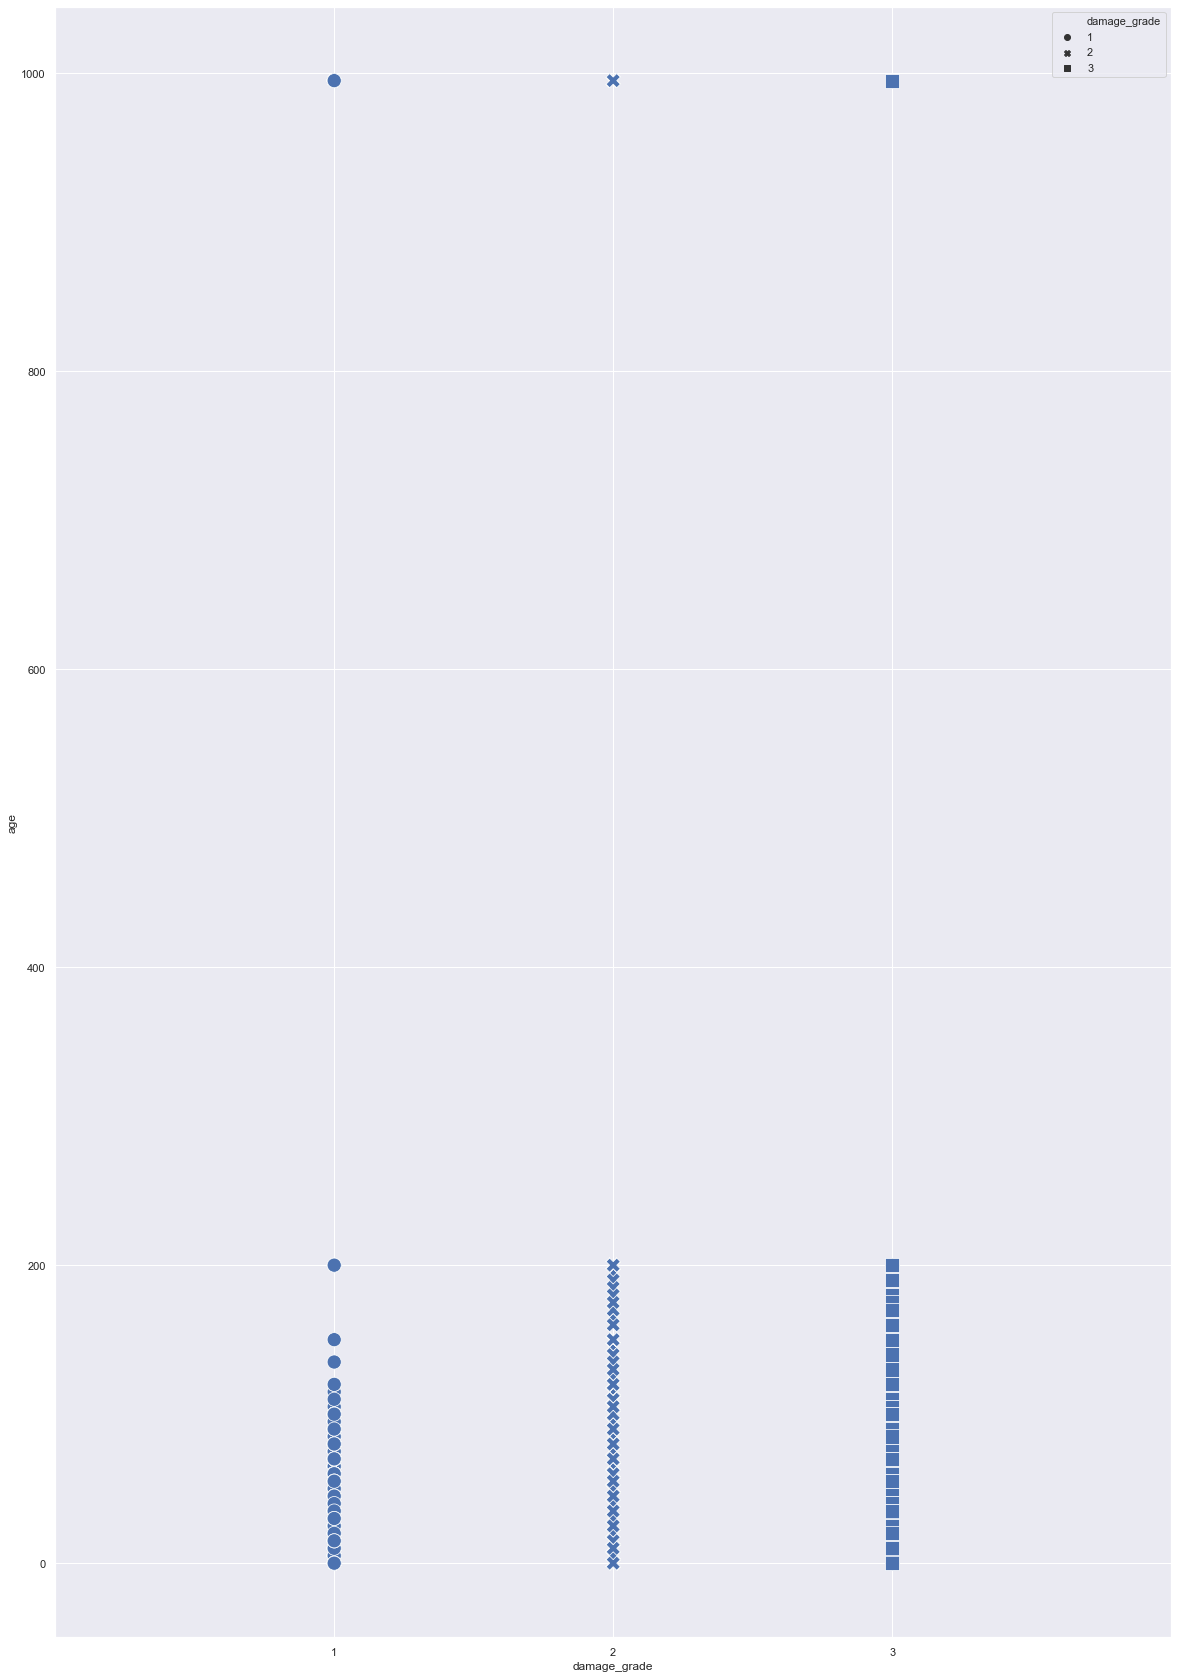

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
sb.scatterplot(x="damage_grade", y= "age",data =combined_data, style = "damage_grade", s=200)
ax.set_xlim(0,4)
ax.set_xticks(range(1,4))
plt.show()


#https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn-in-python
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

#### Usually we will assume that the older the age, the higher the damage it will take. Here we can see that the damage grade is almost equally spread out over the age of the building.

## <font color='tomato'> Conclusion: Age of building does not have an effect on the damage grade </font>

In [11]:
#https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# <font color='mediumblue'>2nd assumption: Maybe plan configuration of the building may have an impact on the damage grade?</font>

### Plotting the number of buildings damaged against different plan configuration

Text(0.5, 1.0, 'Which plan configuration contributed to most damage? \n\n')

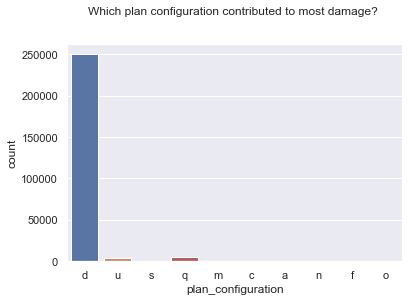

In [12]:
ax = sb.countplot(x="plan_configuration", data=combined_data)
ax.set_title("Which plan configuration contributed to most damage? \n\n")

Text(0.5, 1.0, 'How many buildings are damaged with respect\n to the damage grade for each config plan? \n\n')

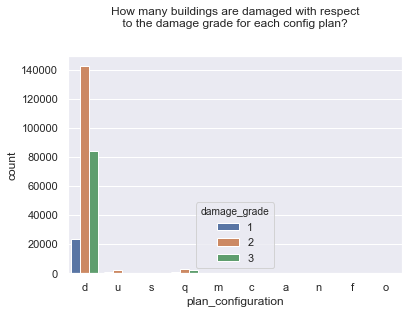

In [13]:
ax = sb.countplot(x="plan_configuration", hue= "damage_grade", data=combined_data)
ax.set_title("How many buildings are damaged with respect\n to the damage grade for each config plan? \n\n")

## <b><font color="tomato">Conclusion:</font></b> 
#### Plan d contributed to most damage to builings
#### Plan q and Plan u was the next 2 highest contributer to damage compared to other plan configurations

## Sorting each config plan to 1 dataframe each

In [14]:
# We take out the plan config out from the combined data and make it into 1 df
# The above mentioned is used for looping only
planConfigDf = combined_data['plan_configuration']
planConfigDf.head()

0    d
1    d
2    d
3    d
4    d
Name: plan_configuration, dtype: object

In [15]:
# Empty lists for each plan configuration
aPlan= []
cPlan= []
dPlan= []
fPlan= []
mPlan= []
nPlan= []
oPlan= []
qPlan= []
sPlan= []
uPlan= []

# Here we add to the list accoridingly, with reference from the combined_data
for x in range(0,len(combined_data)):
    if(planConfigDf.iloc[x] == 'a'):
        aPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'c'):
        cPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'd'):
        dPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'f'):
        fPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'm'):
        mPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'n'):
        nPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'o'):
        oPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'q'):
        qPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 's'):
        sPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'u'):
        uPlan.append(combined_data.iloc[x])

In [16]:
# convert all the lists into dataframes
aPlanDf= pd.DataFrame(aPlan)
cPlanDf= pd.DataFrame(cPlan)
dPlanDf= pd.DataFrame(dPlan)
fPlanDf= pd.DataFrame(fPlan)
mPlanDf= pd.DataFrame(mPlan)
nPlanDf= pd.DataFrame(nPlan)
oPlanDf= pd.DataFrame(oPlan)
qPlanDf= pd.DataFrame(qPlan)
sPlanDf= pd.DataFrame(sPlan)
uPlanDf= pd.DataFrame(uPlan)

#https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/

In [17]:
print("Number of buildings damaged in each configuration plan")
print("Plan Configuration A: ",len(aPlanDf))
print("Plan Configuration C: ",len(cPlanDf))
print("Plan Configuration D: ",len(dPlanDf))
print("Plan Configuration F: ",len(fPlanDf))
print("Plan Configuration M: ",len(mPlanDf))
print("Plan Configuration N: ",len(nPlanDf))
print("Plan Configuration O: ",len(oPlanDf))
print("Plan Configuration Q: ",len(qPlanDf))
print("Plan Configuration S: ",len(sPlanDf))
print("Plan Configuration U: ",len(uPlanDf))

print("\n\n Sum of all the plans: ",len(aPlanDf+cPlanDf+dPlanDf
                                        +fPlanDf+mPlanDf+nPlanDf
                                        +oPlanDf+qPlanDf+sPlanDf+uPlanDf))

Number of buildings damaged in each configuration plan
Plan Configuration A:  252
Plan Configuration C:  325
Plan Configuration D:  250072
Plan Configuration F:  22
Plan Configuration M:  46
Plan Configuration N:  38
Plan Configuration O:  159
Plan Configuration Q:  5692
Plan Configuration S:  346
Plan Configuration U:  3649


 Sum of all the plans:  260601


In [18]:
# For using in loop
config_planArr = aPlanDf,cPlanDf,dPlanDf,fPlanDf,mPlanDf,nPlanDf,oPlanDf,qPlanDf,sPlanDf,uPlanDf

In [19]:
len(config_planArr)

10

In [20]:
#used for titles in array
config_titlesArr = ["Plan Configuration A","Plan Configuration C","Plan Configuration D",
                "Plan Configuration F","Plan Configuration M","Plan Configuration N",
                "Plan Configuration O","Plan Configuration Q","Plan Configuration S",
                "Plan Configuration U",]

## Plotting number of buildings damaged for each config plans for each damage level (in detail)

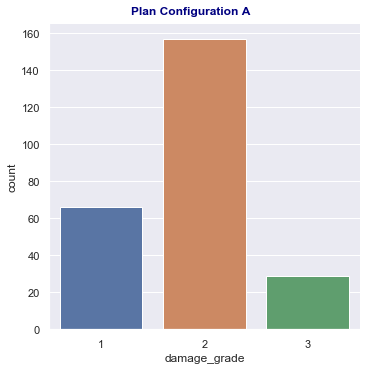

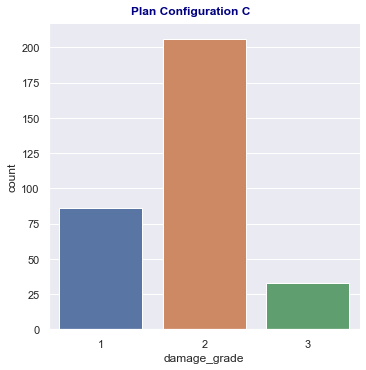

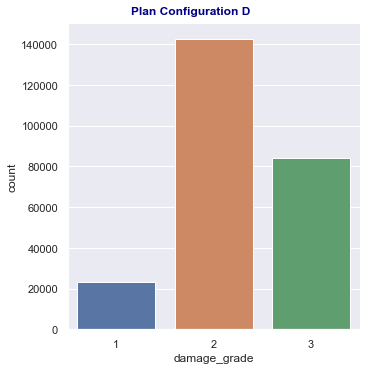

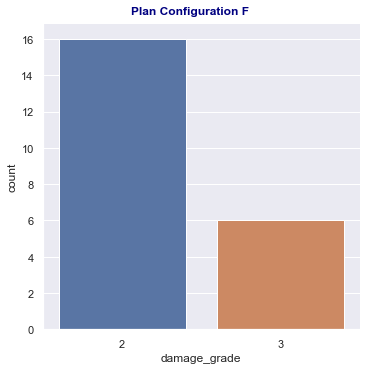

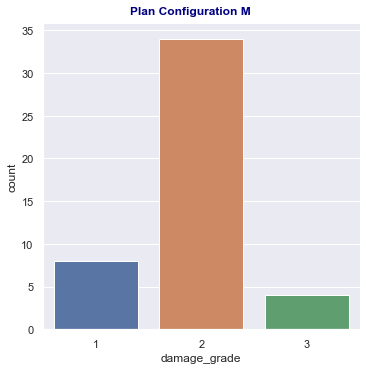

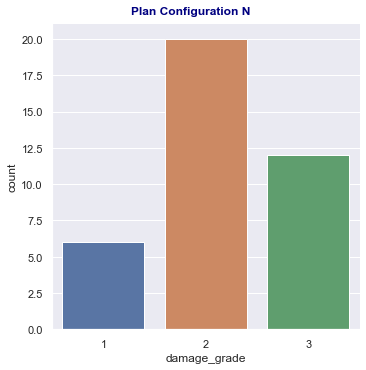

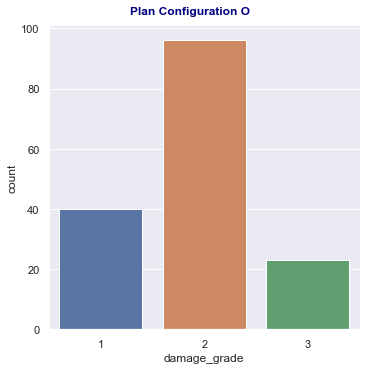

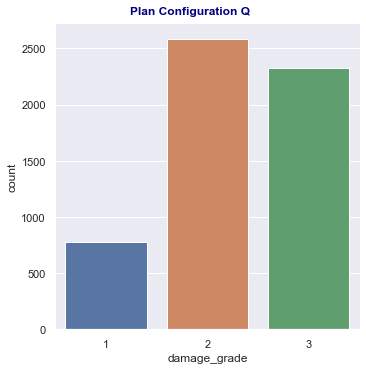

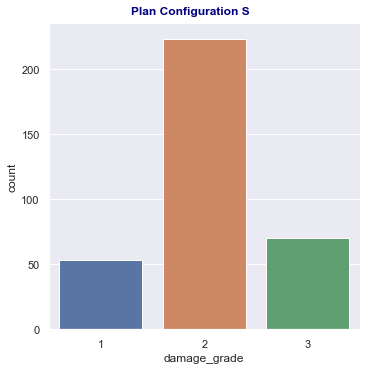

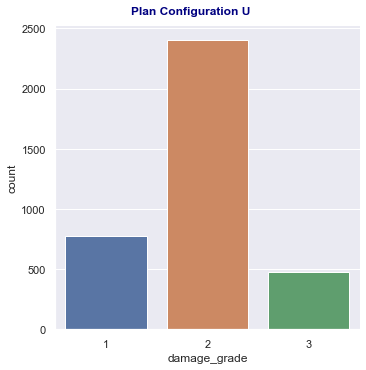

In [21]:
for x in range(0,10):
    ax = sb.catplot(x = "damage_grade", data = config_planArr[x], kind = "count",height=5)
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

#### It can be seen from the above that plan configuration d contributed to all the damage grades

## Plotting the area and height percentage against the config plans

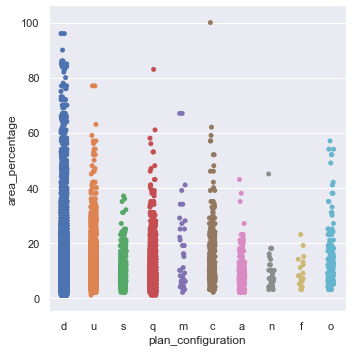

In [22]:
sb.catplot(x="plan_configuration", y = "area_percentage", data=combined_data)

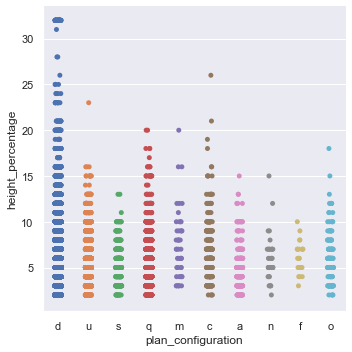

In [23]:
sb.catplot(x="plan_configuration", y = "height_percentage", data=combined_data)

## Plotting area vs height against damage for each config plan

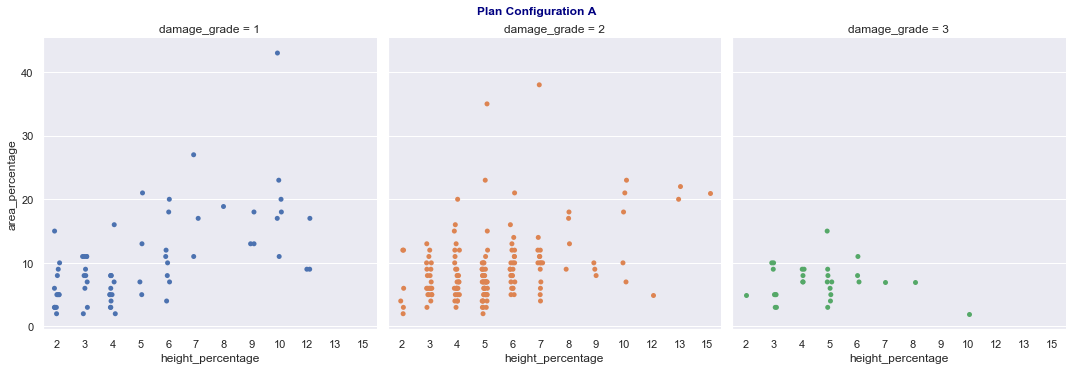

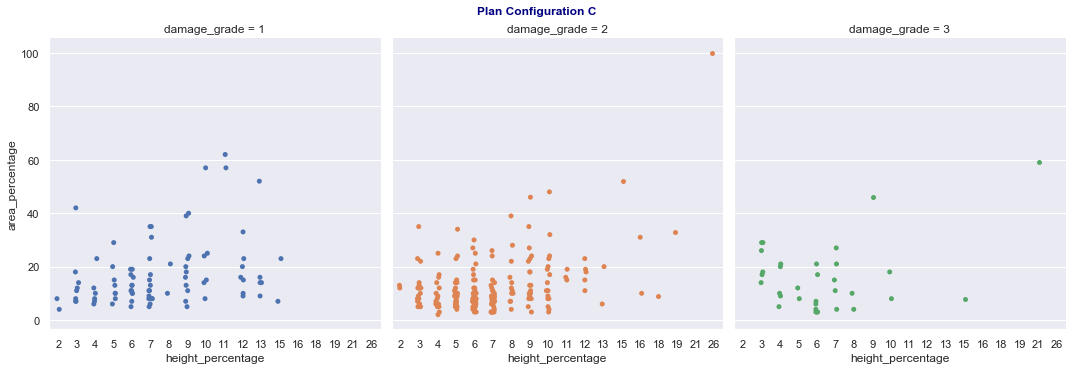

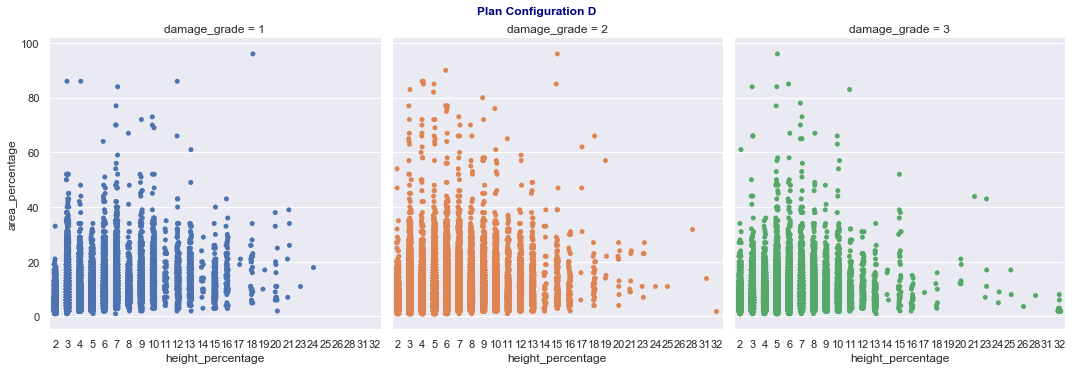

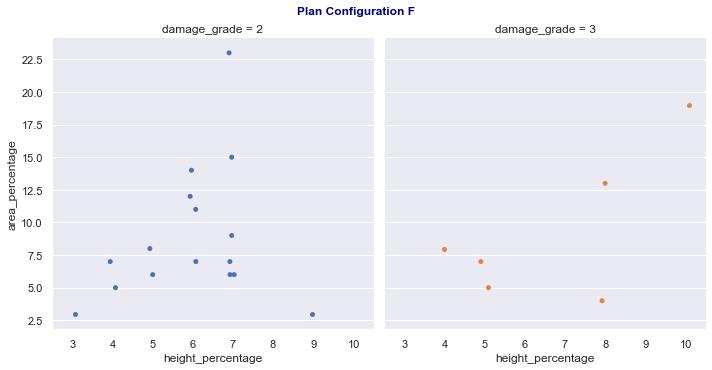

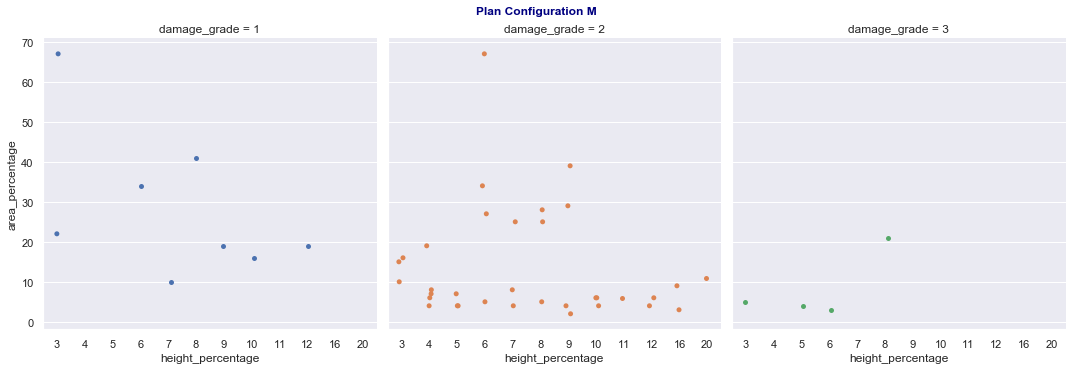

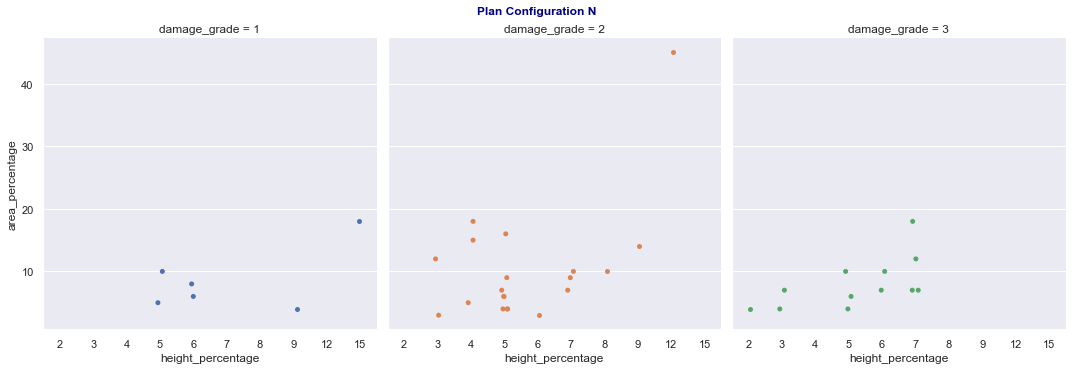

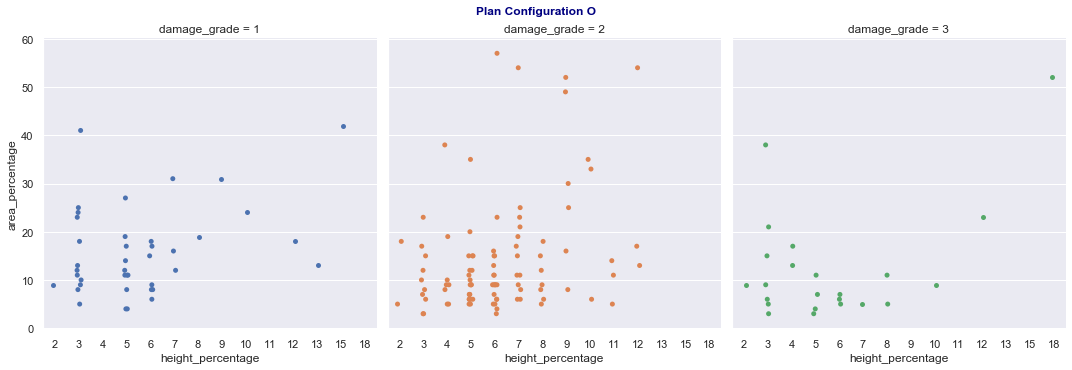

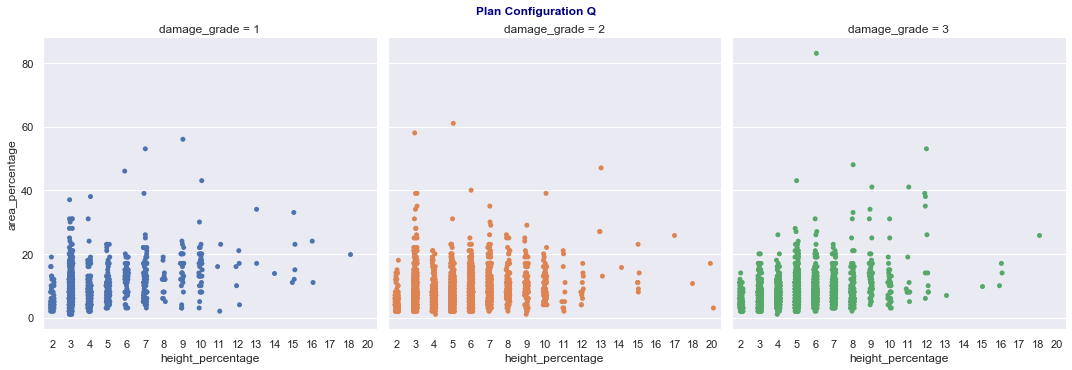

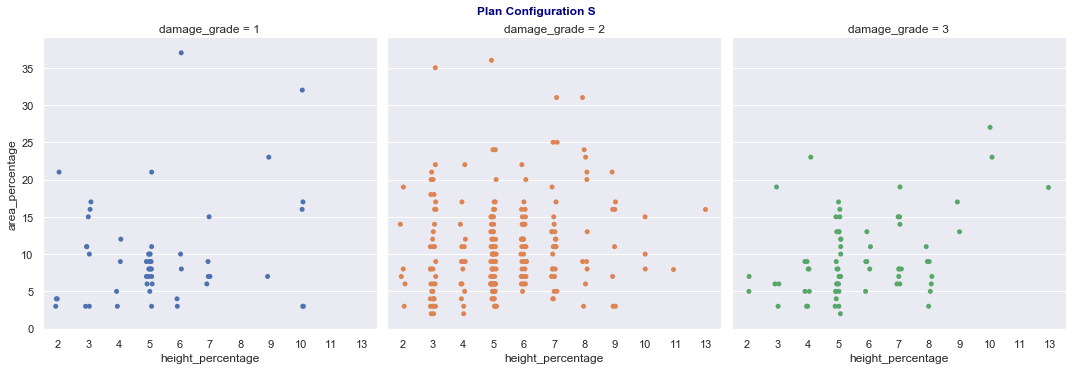

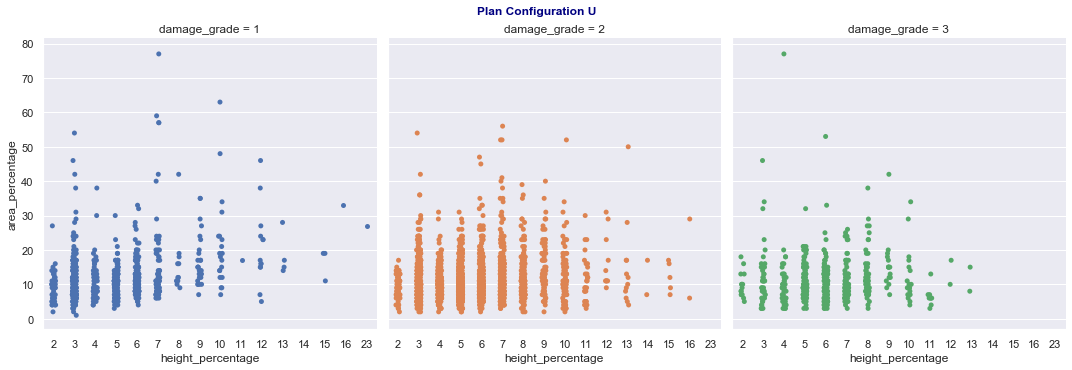

In [24]:
#https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
for x in range(0,10):
    ax = sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=config_planArr[x],col="damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

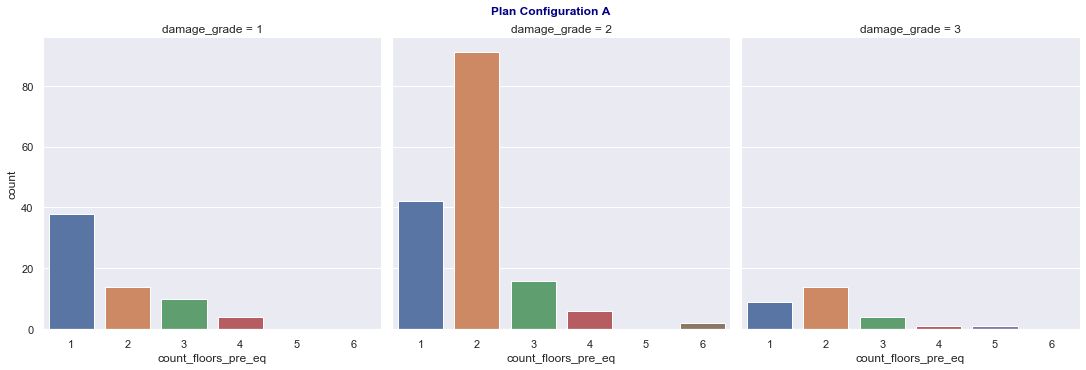

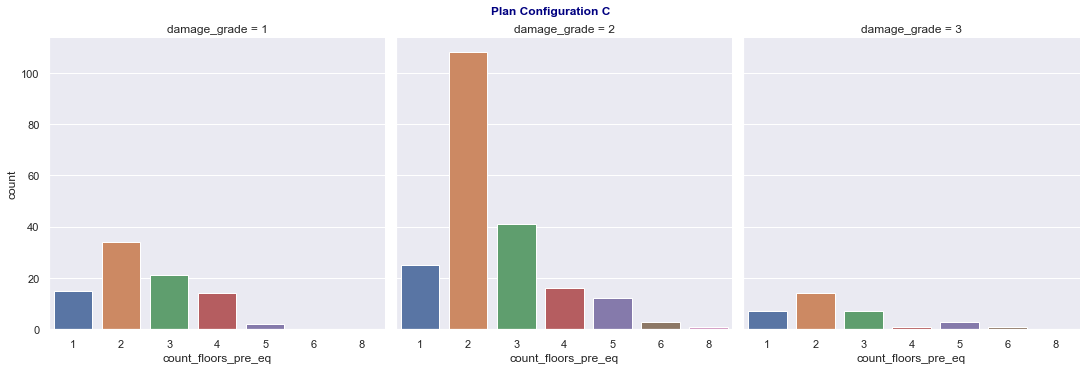

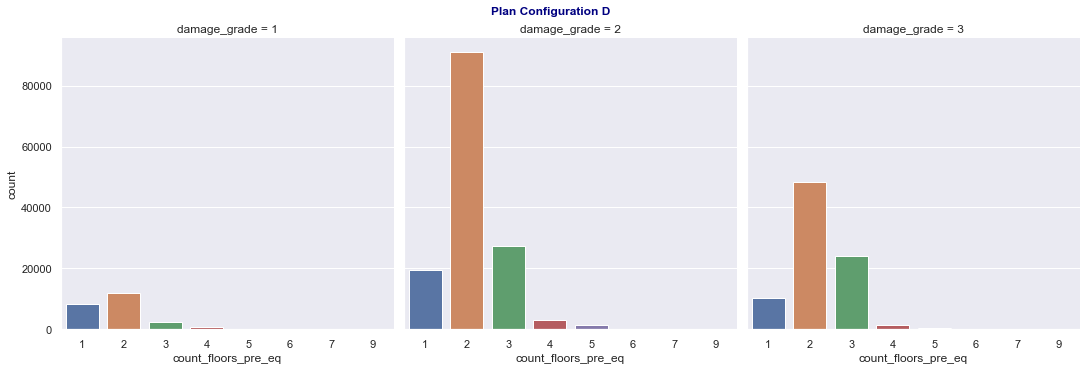

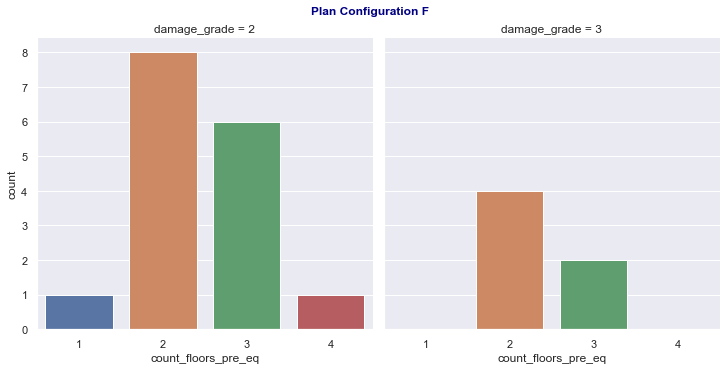

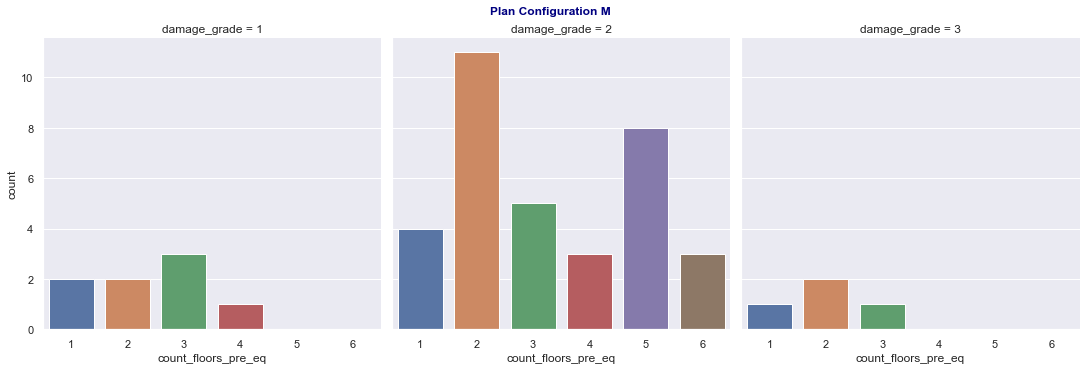

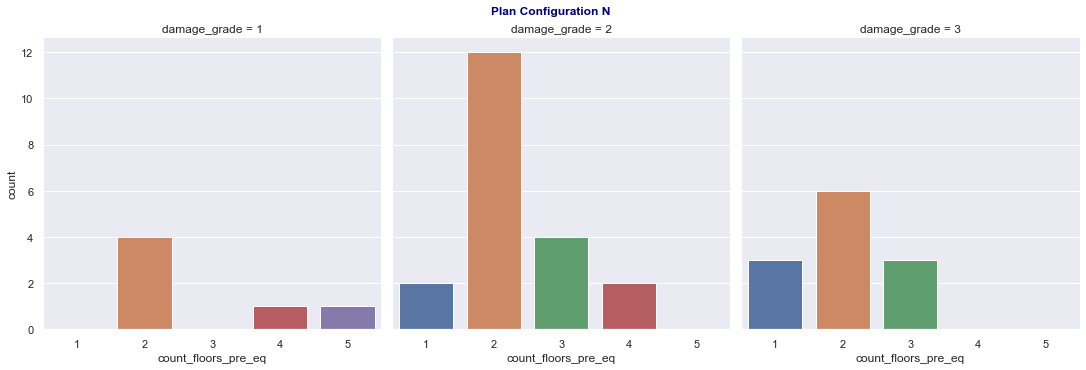

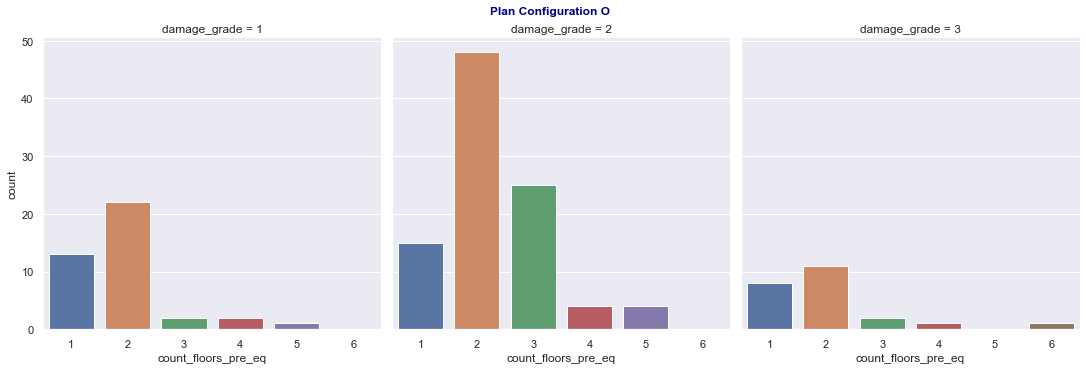

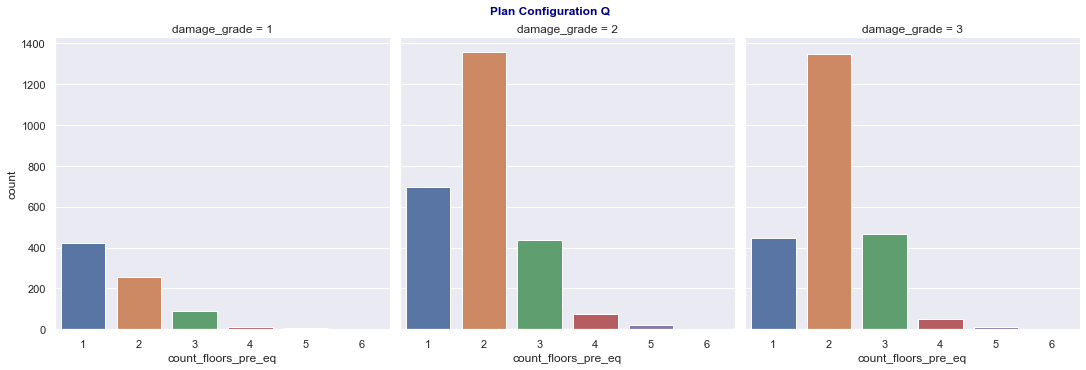

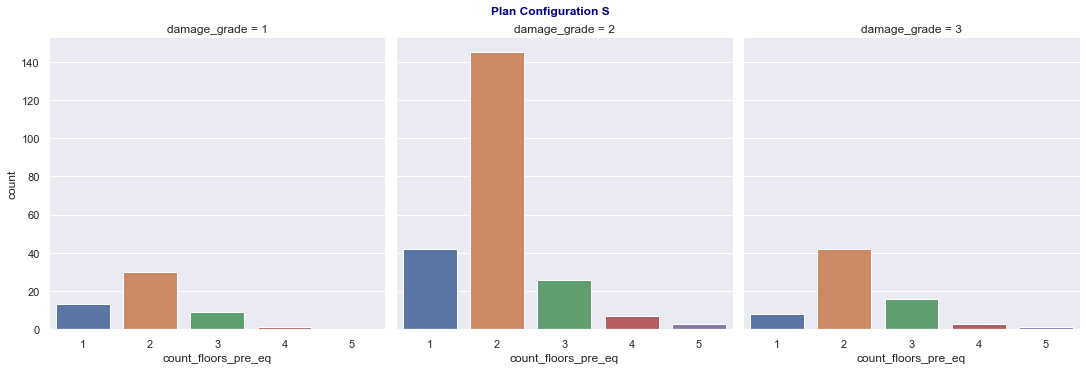

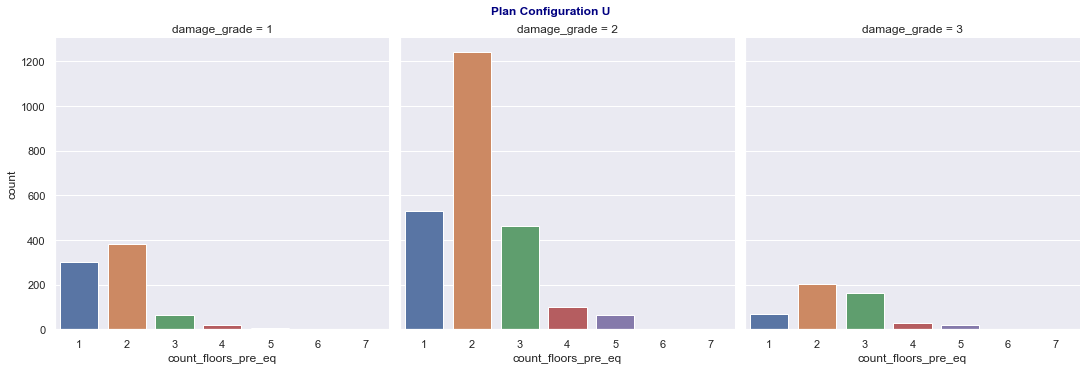

In [25]:
for x in range(0,10):
    ax = sb.catplot(x = "count_floors_pre_eq", data = config_planArr[x], kind = "count",height=5, col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

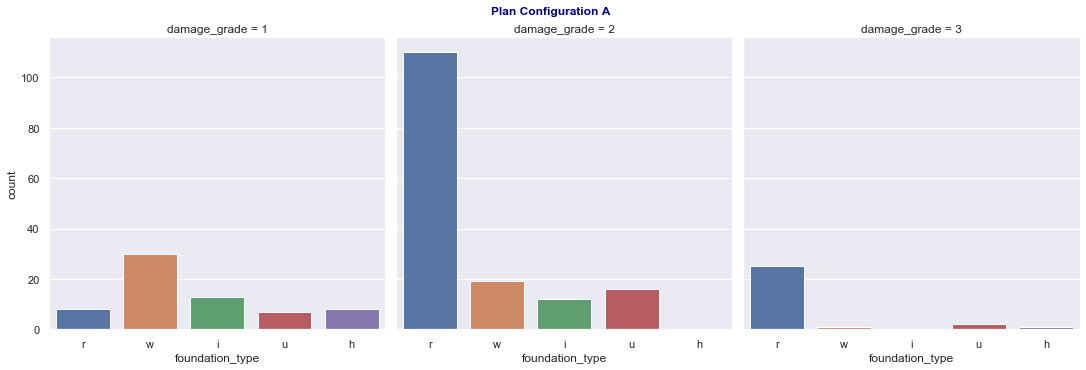

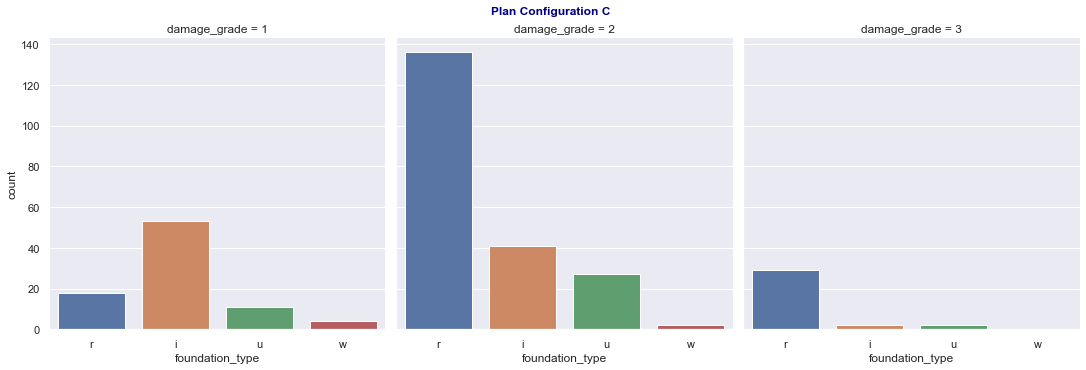

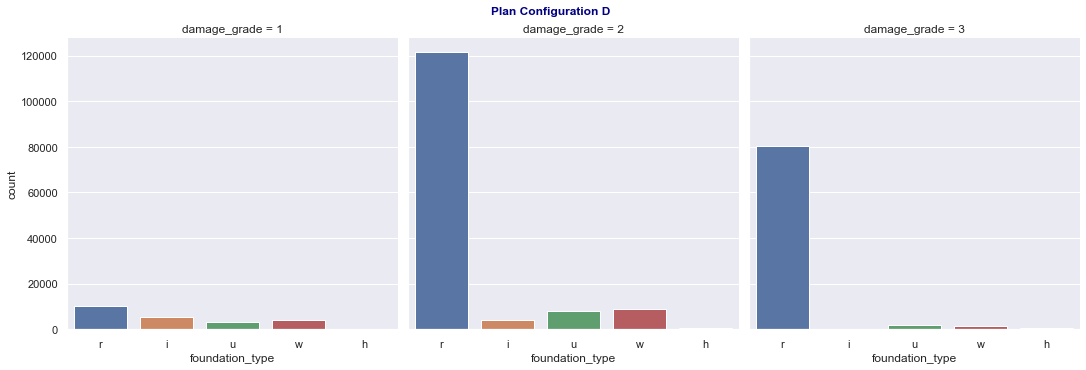

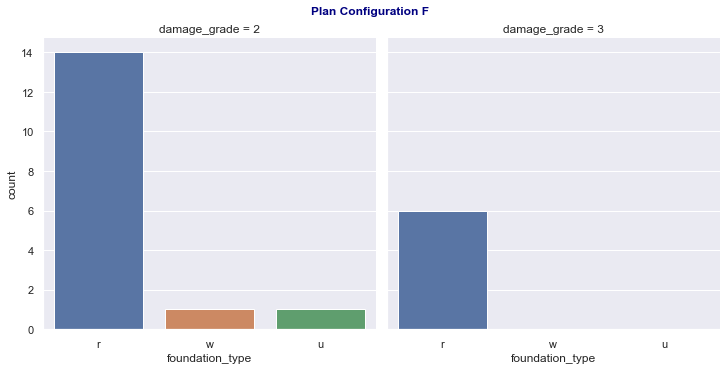

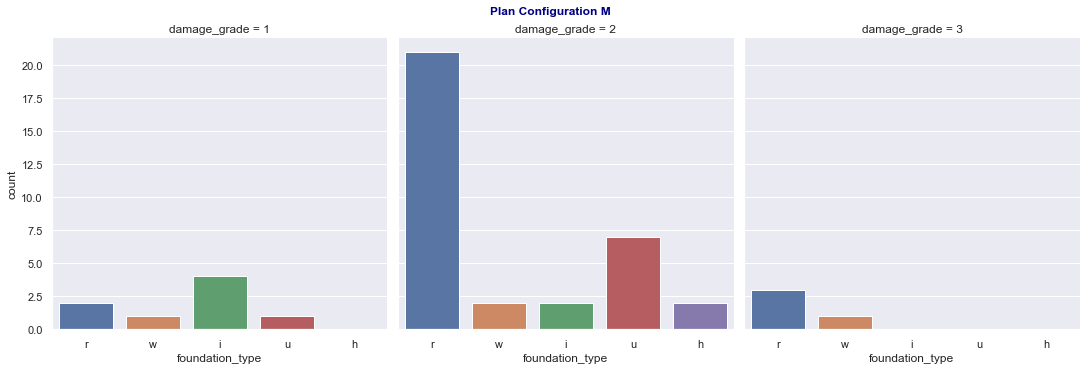

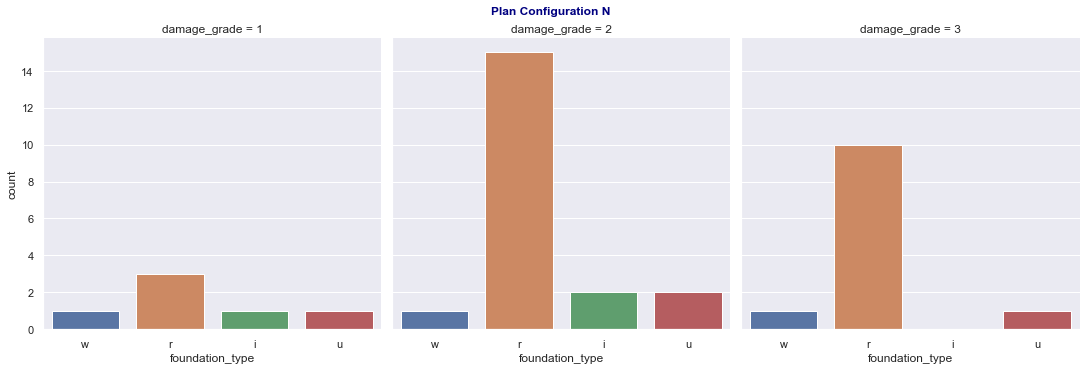

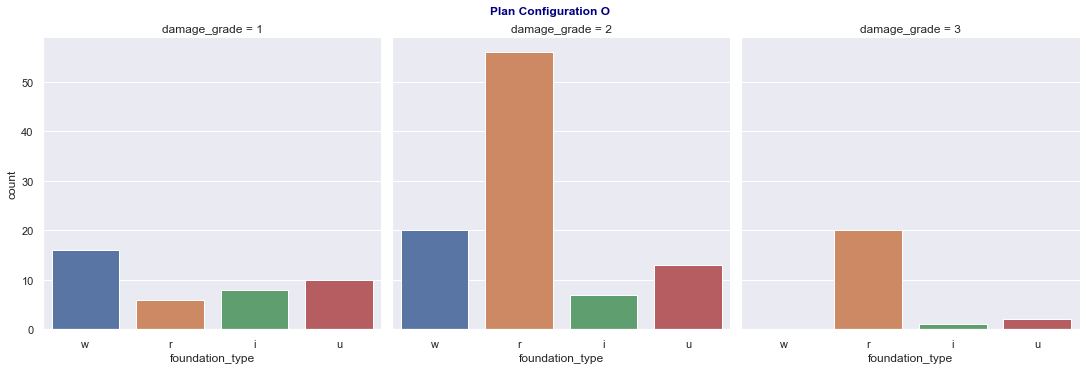

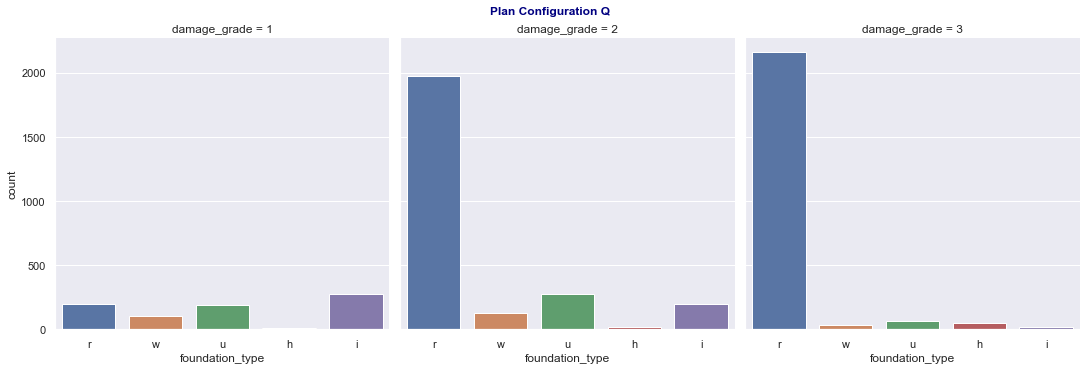

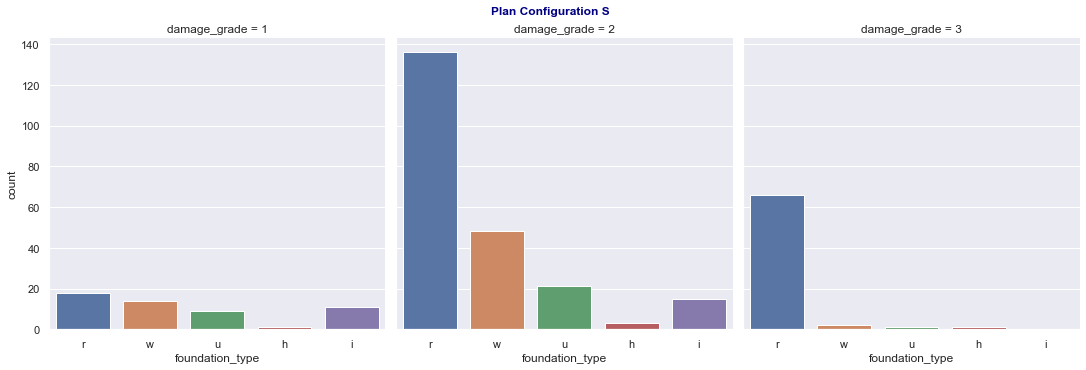

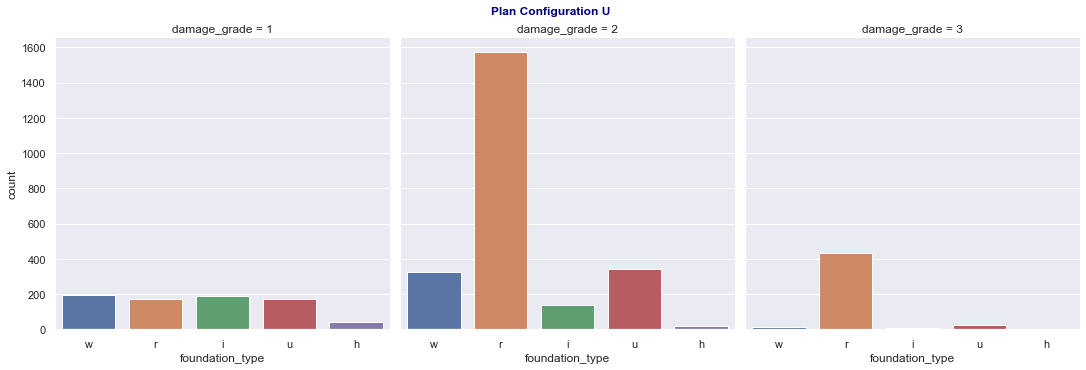

In [46]:
for x in range(0,10):
    ax = sb.catplot(x = "foundation_type", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

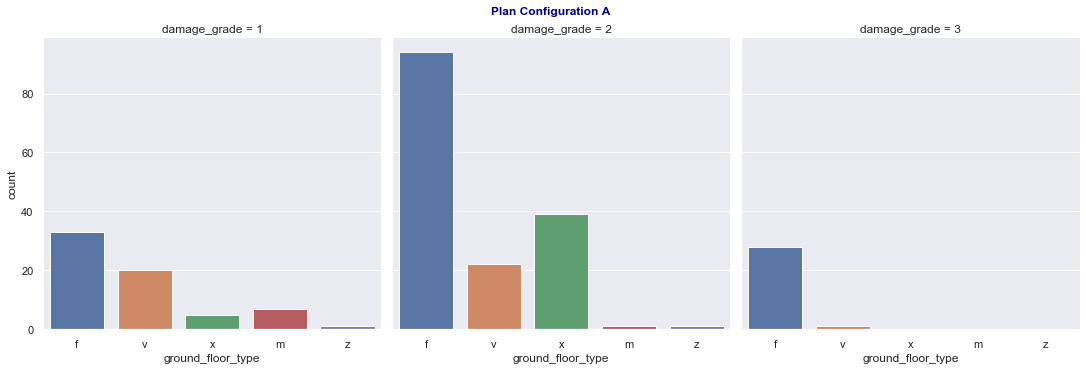

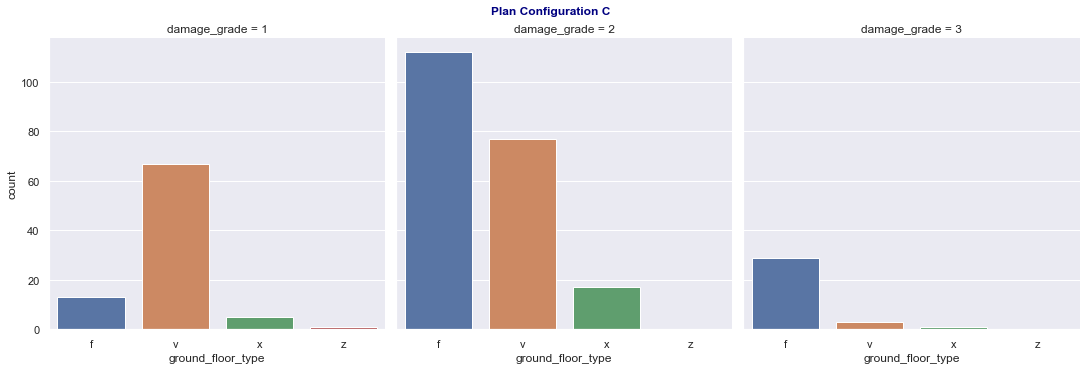

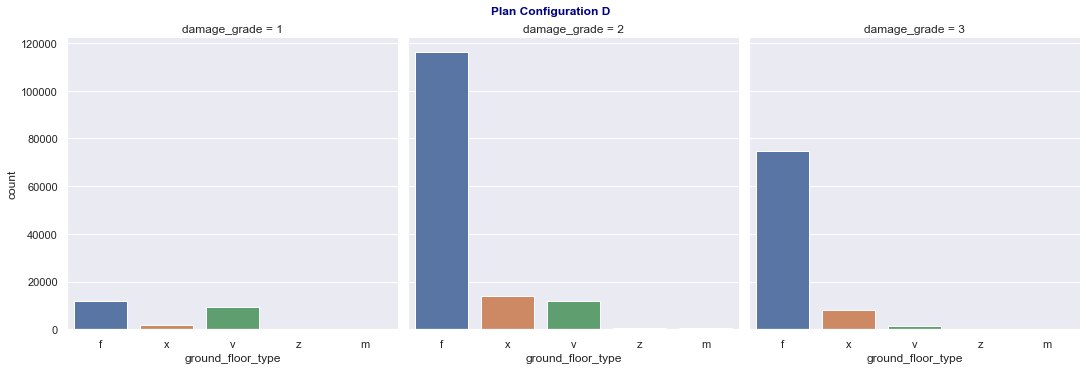

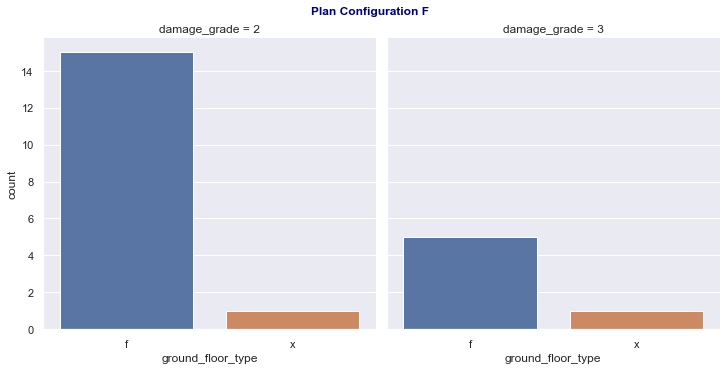

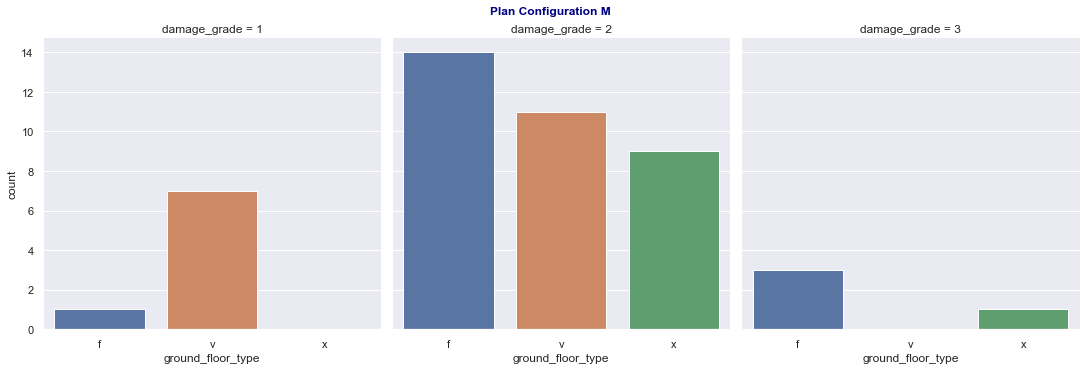

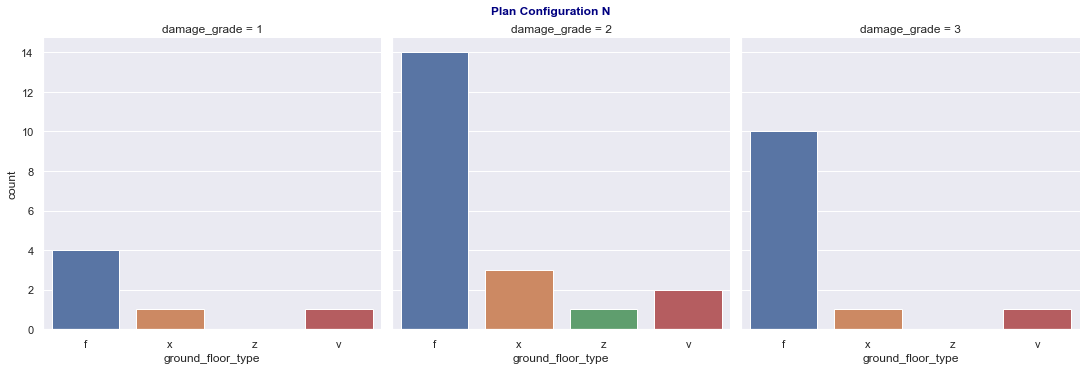

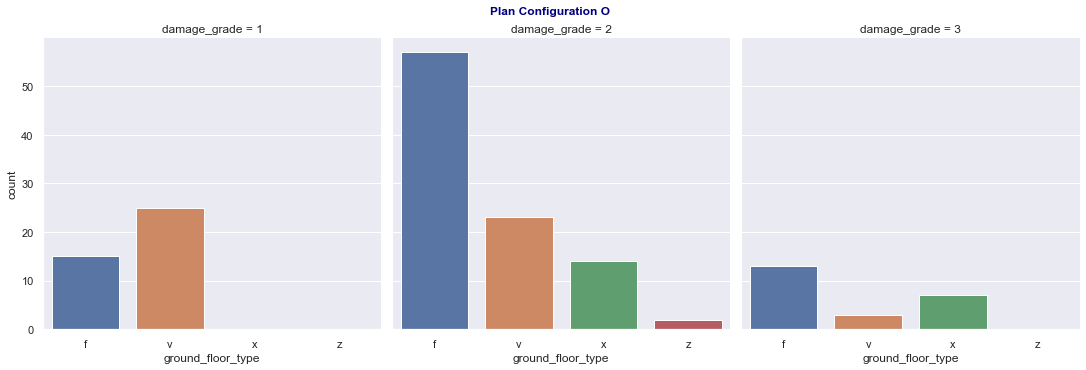

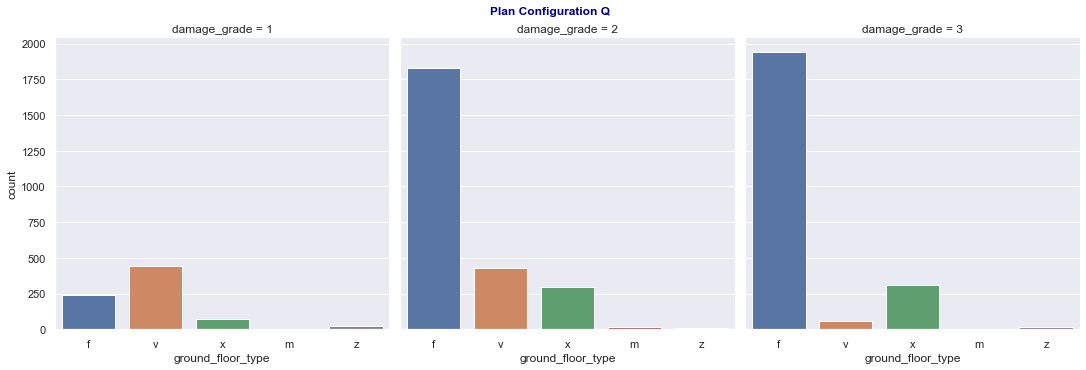

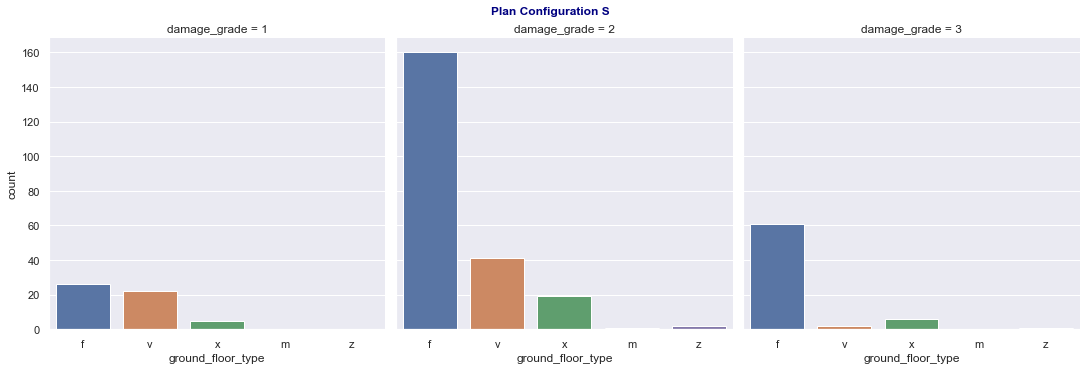

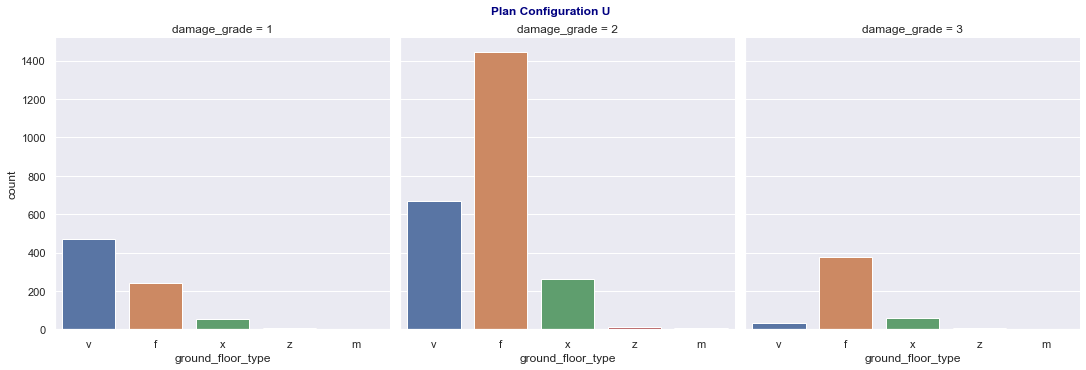

In [45]:
for x in range(0,10):
    ax = sb.catplot(x = "ground_floor_type", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

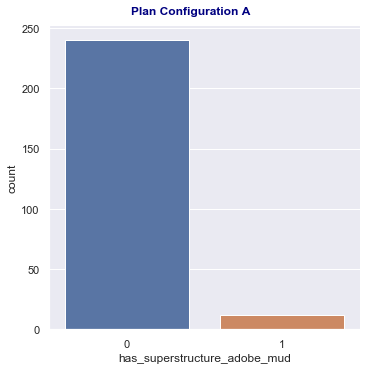

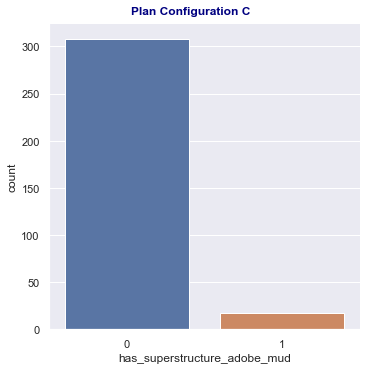

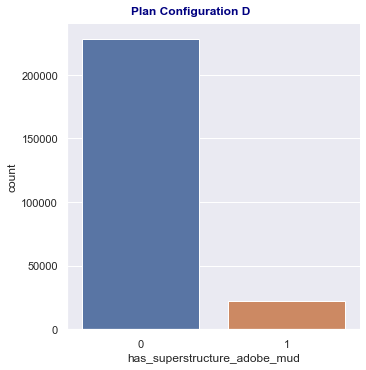

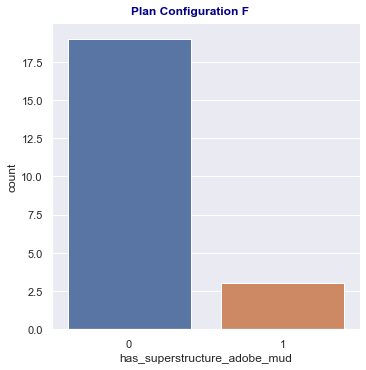

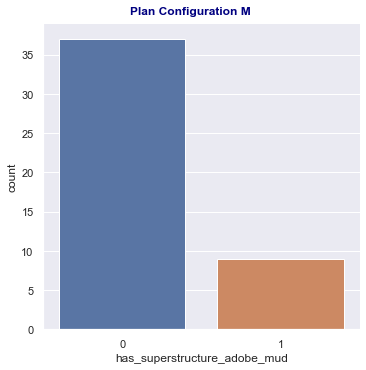

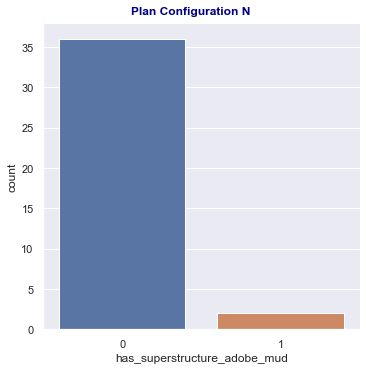

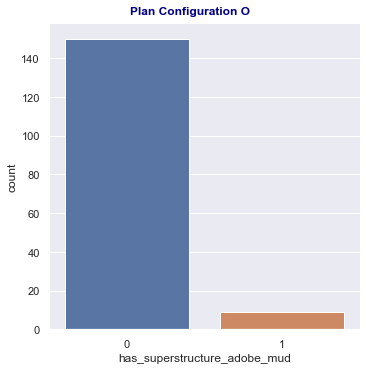

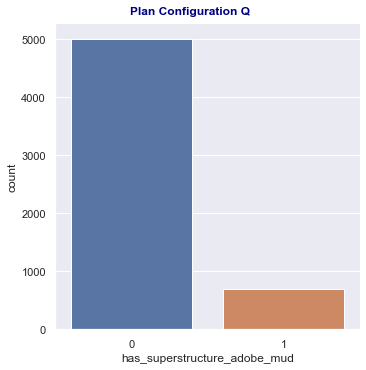

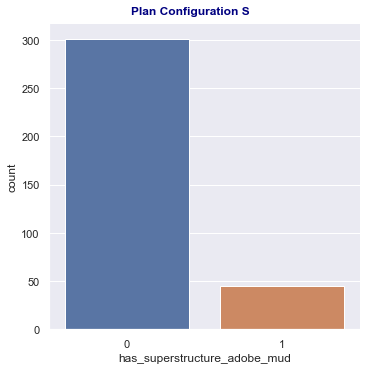

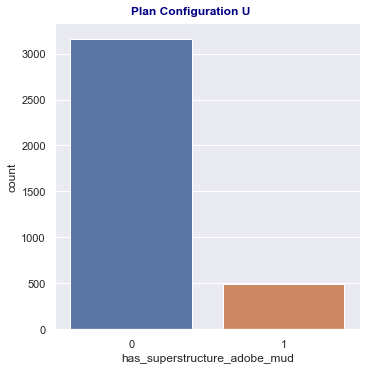

In [53]:
for x in range(0,10):
    ax = sb.catplot(x = "has_superstructure_adobe_mud", data = config_planArr[x], kind = "count",height=5)
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

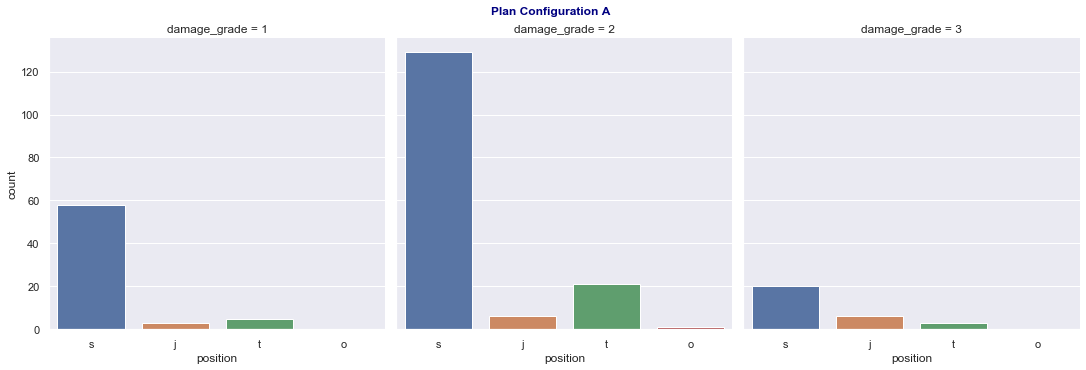

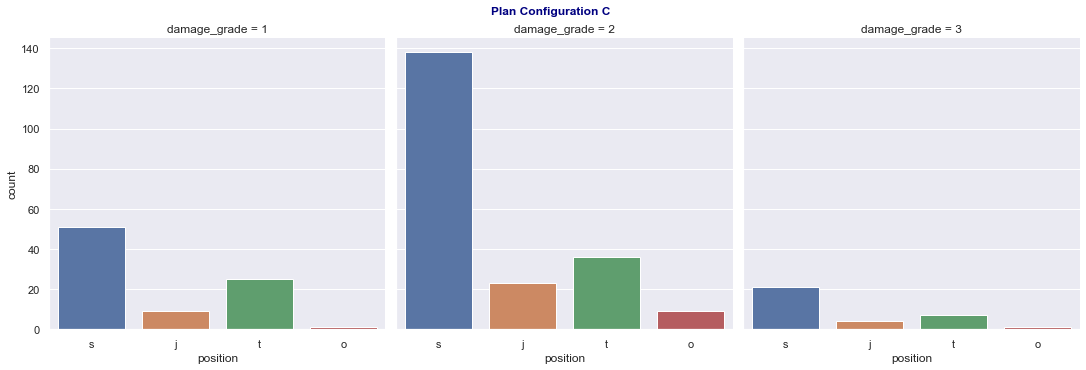

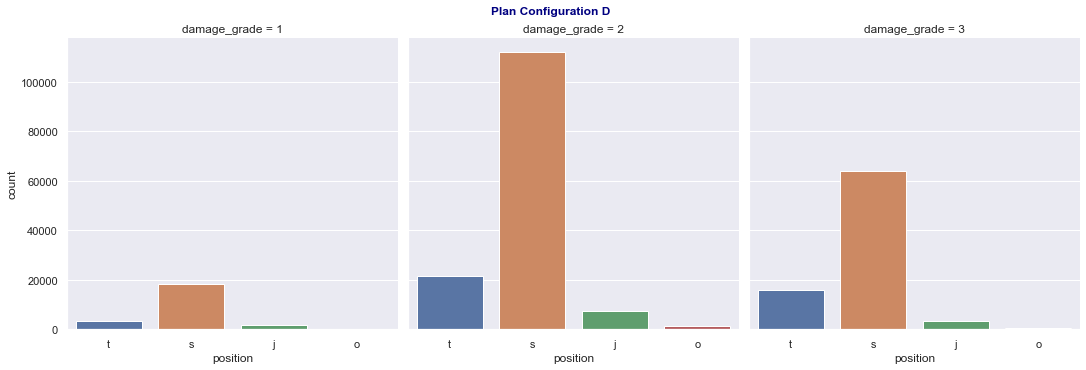

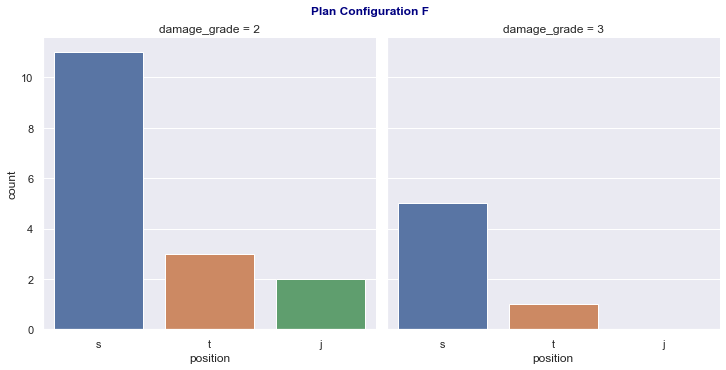

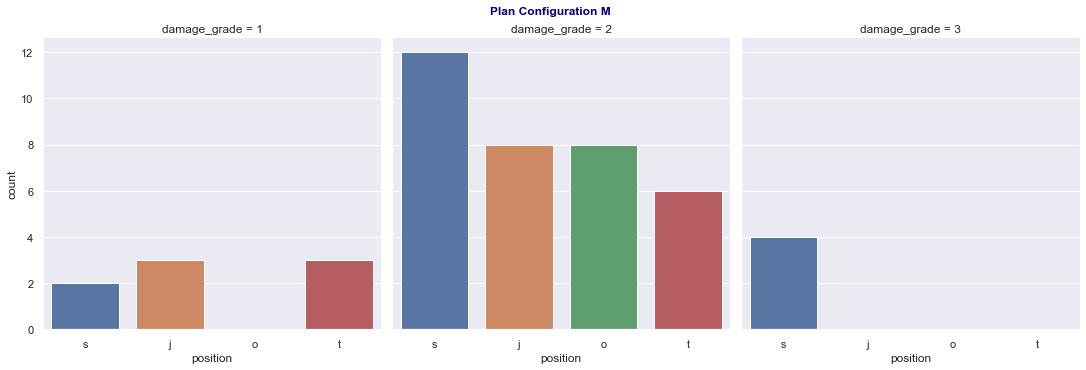

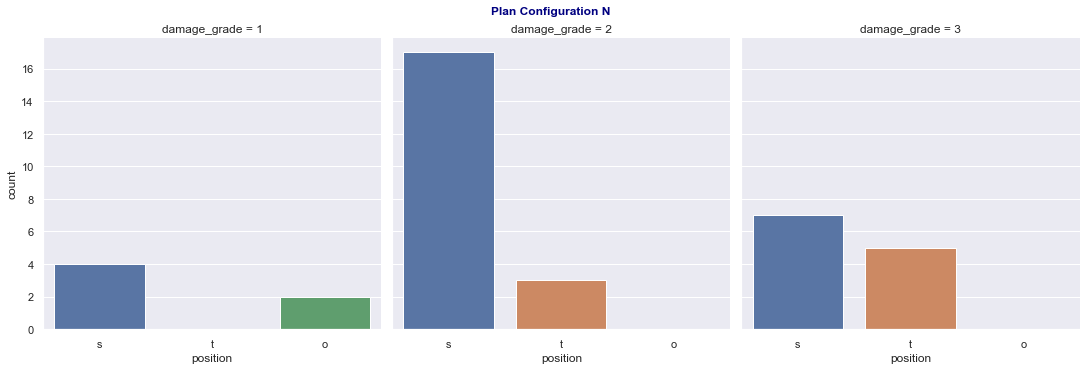

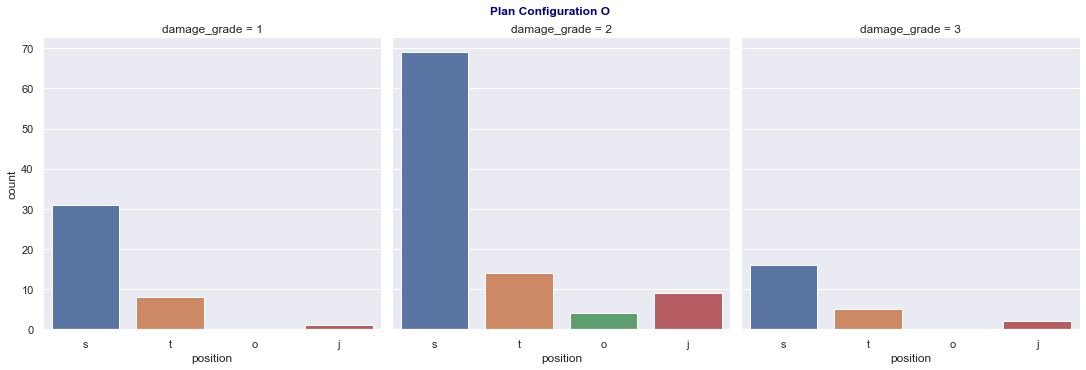

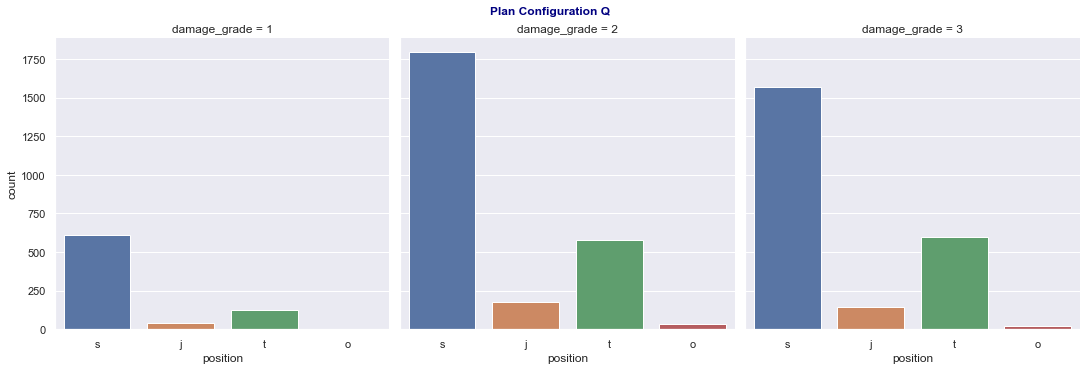

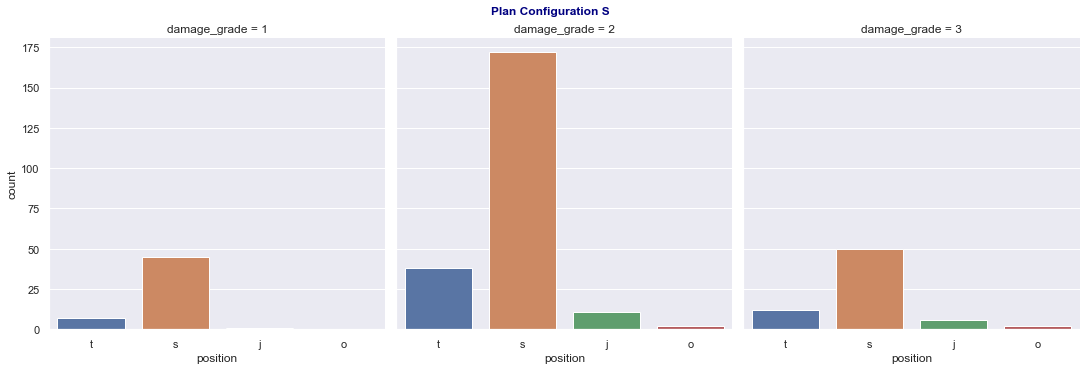

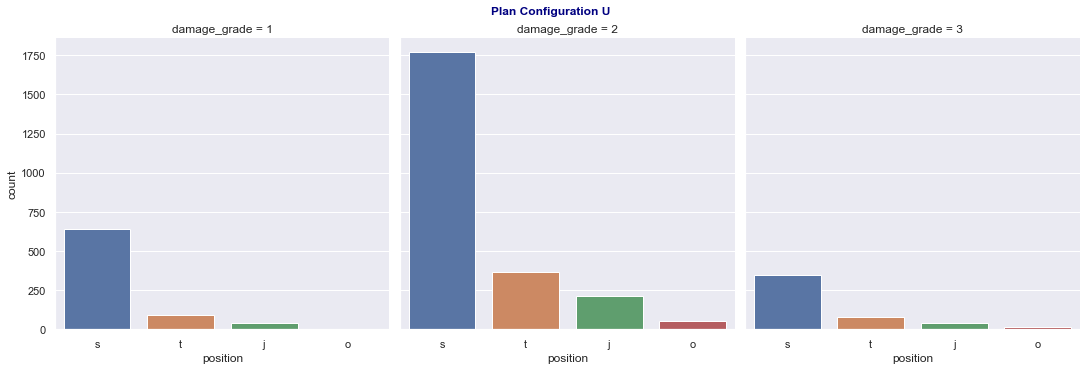

In [57]:
for x in range(0,10):
    ax = sb.catplot(x = "position", data = config_planArr[x], kind = "count",height=5,col = "damage_grade")
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

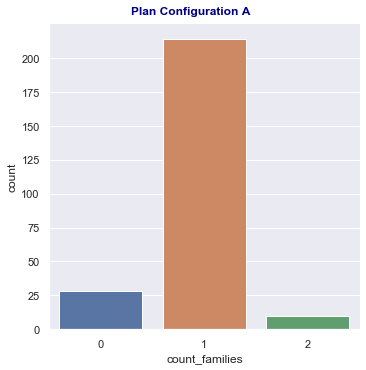

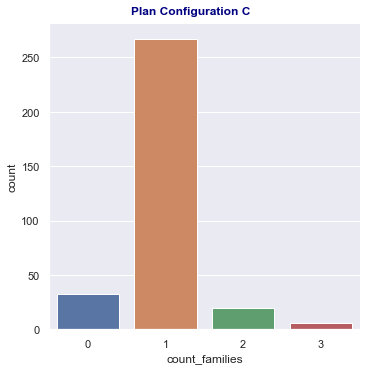

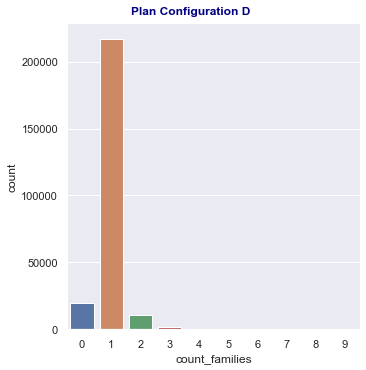

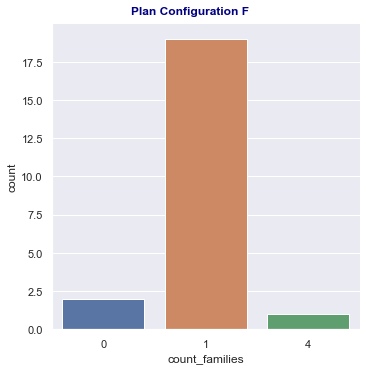

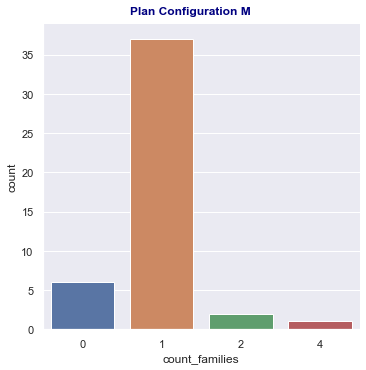

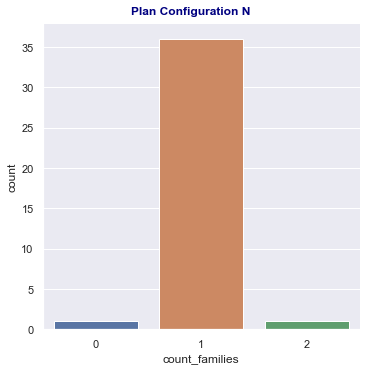

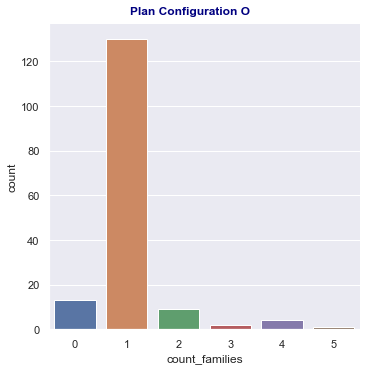

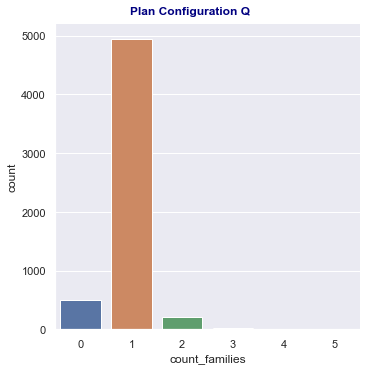

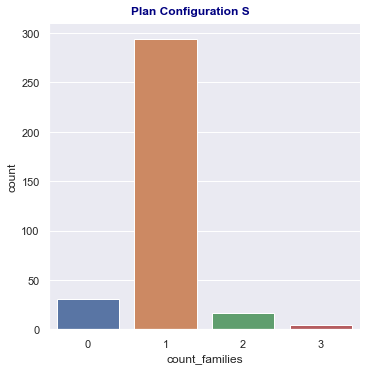

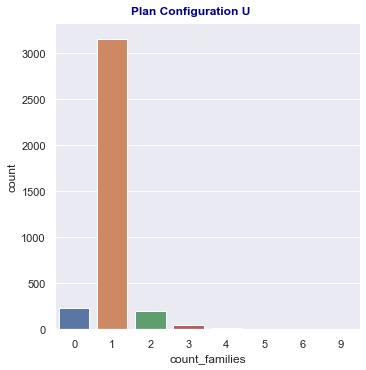

In [74]:
for x in range(0,10):
    ax=sb.catplot(x="count_families",  data=config_planArr[x],kind = 'count')
    ax.fig.suptitle(config_titlesArr[x], y=1.02, fontsize = 12,fontweight="bold",color="navy")

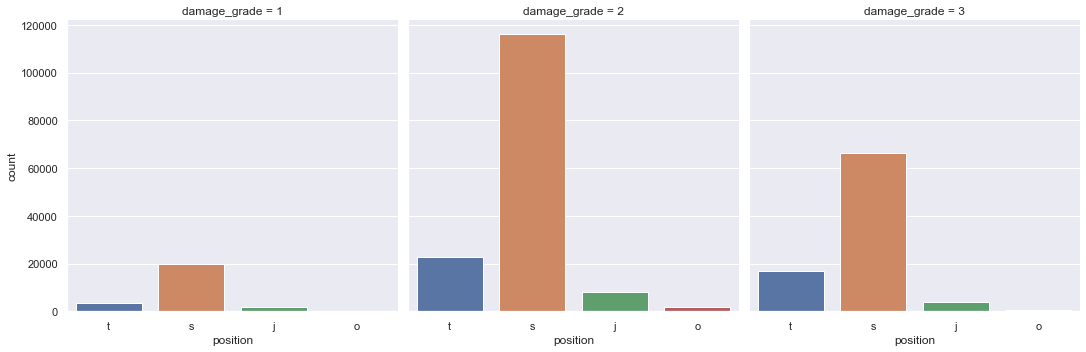

In [59]:
sb.catplot(x="position",  data=combined_data,kind = 'count',col = "damage_grade")

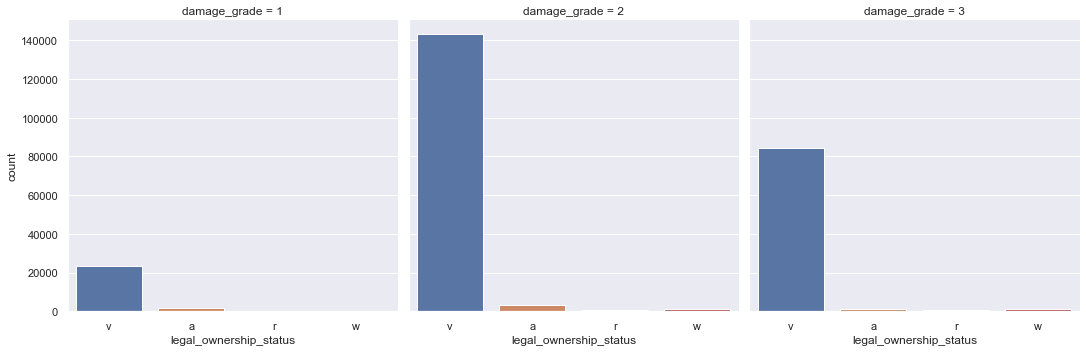

In [60]:
sb.catplot(x="legal_ownership_status",  data=combined_data,kind = 'count',col = "damage_grade")

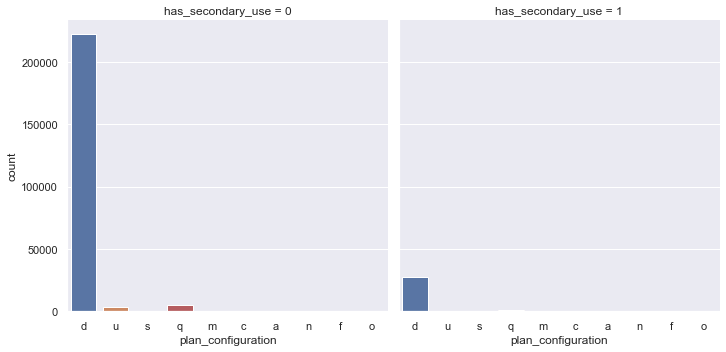

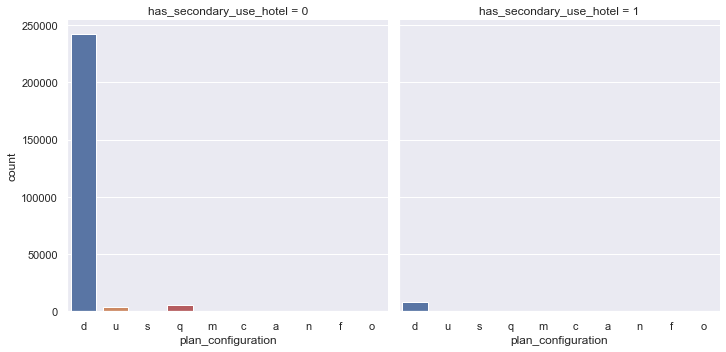

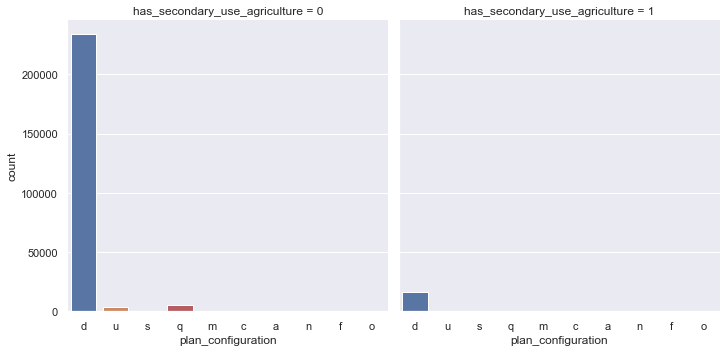

In [91]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_secondary_use") 
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_secondary_use_hotel")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_secondary_use_agriculture")

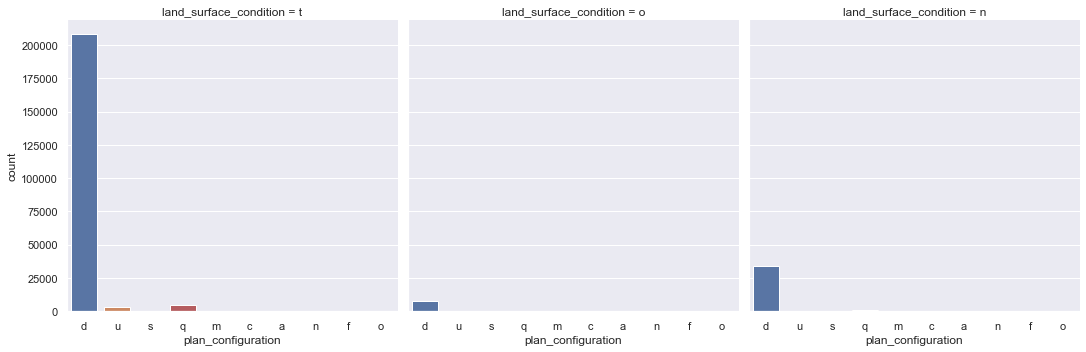

In [92]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "land_surface_condition")

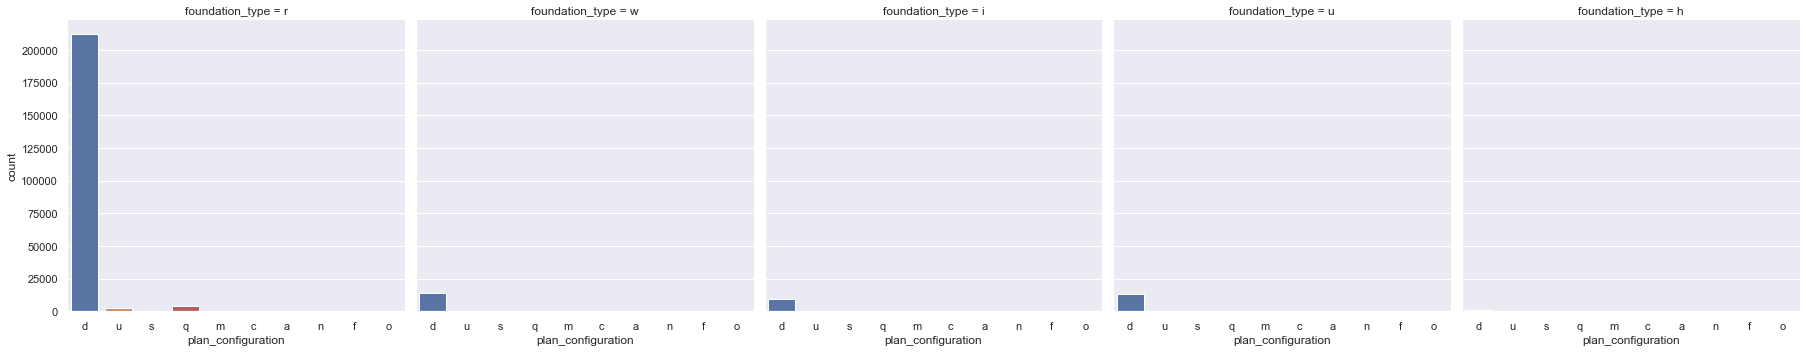

In [93]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "foundation_type")

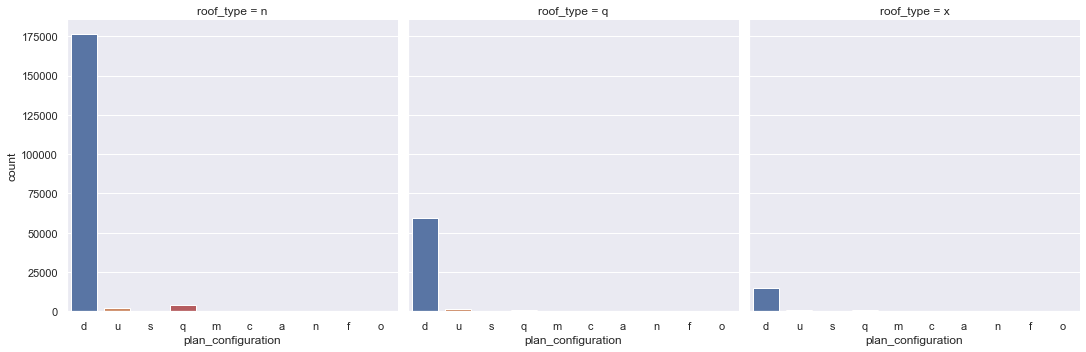

In [94]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "roof_type")

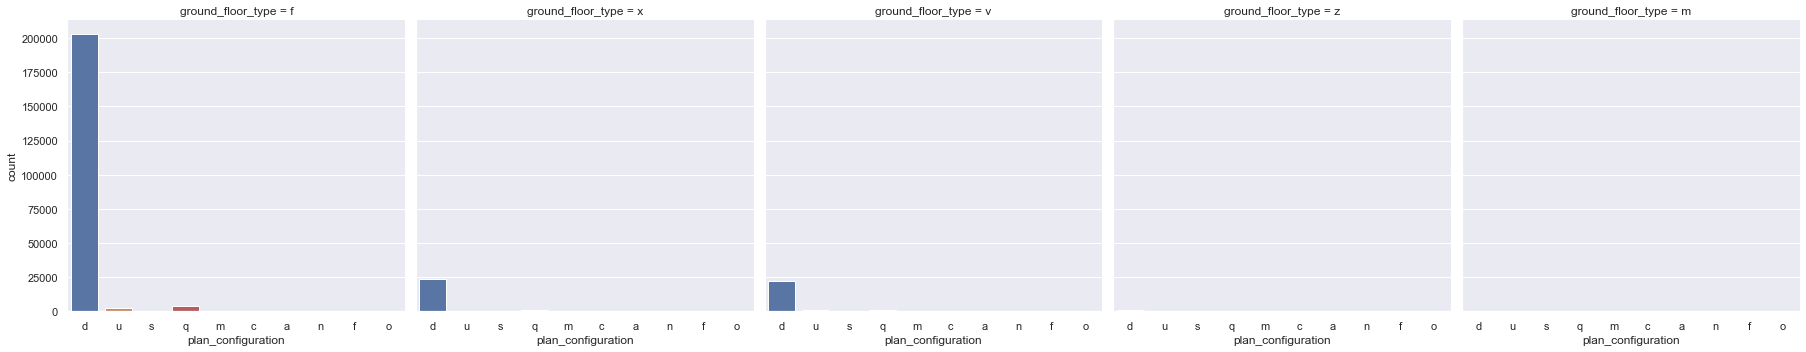

In [95]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "ground_floor_type")

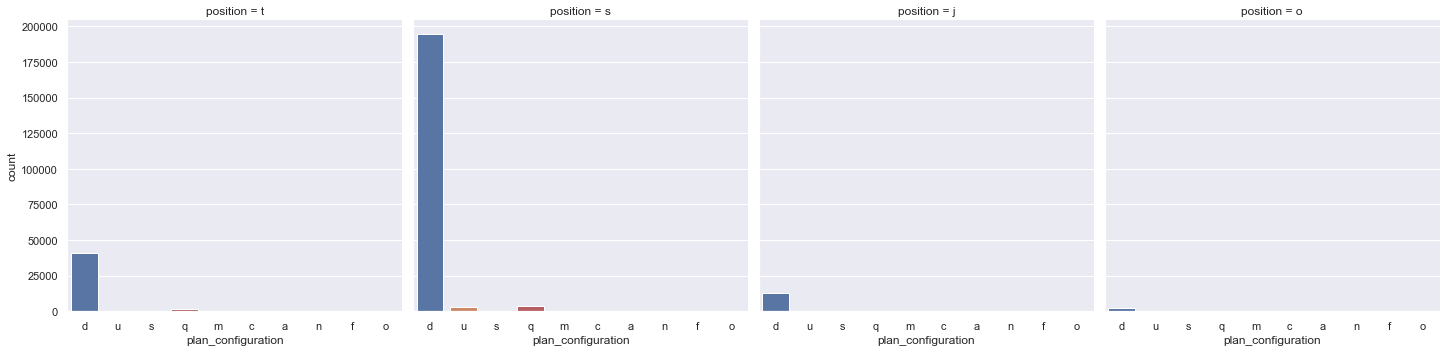

In [96]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "position")

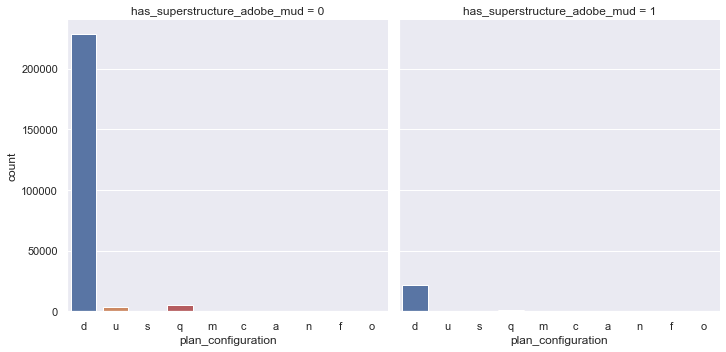

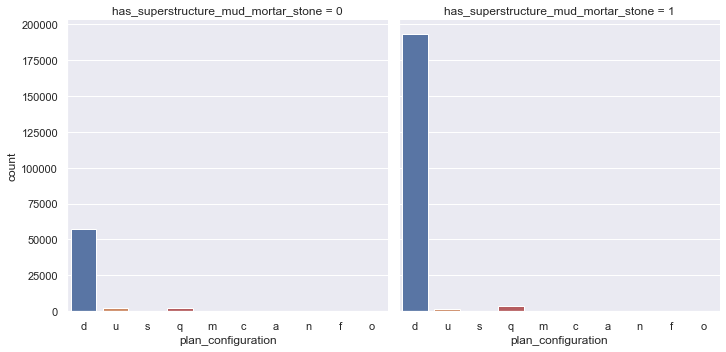

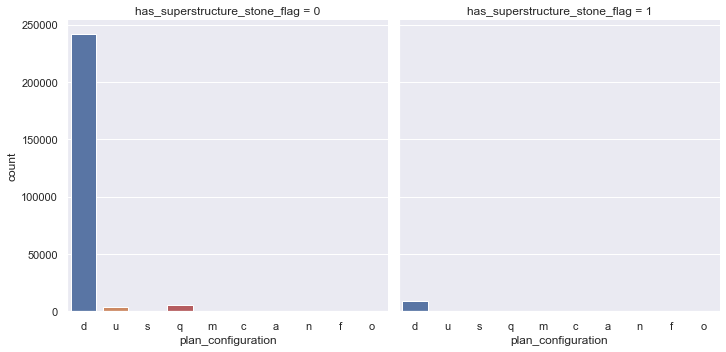

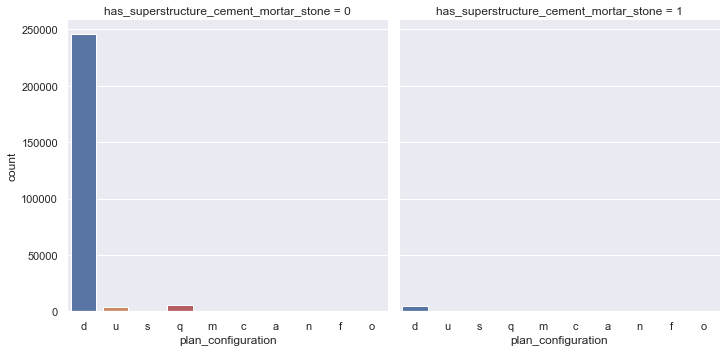

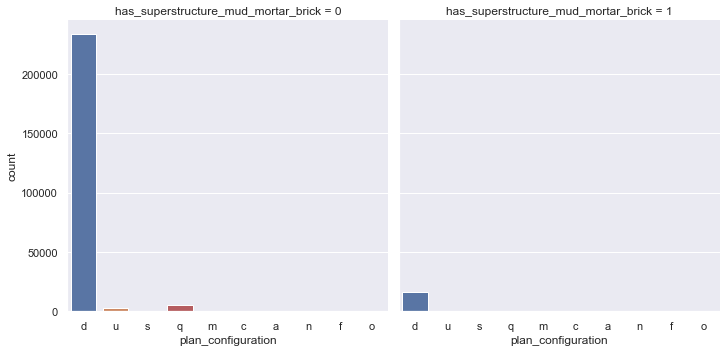

In [104]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_adobe_mud")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_mud_mortar_stone")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_stone_flag")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_cement_mortar_stone")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_mud_mortar_brick")

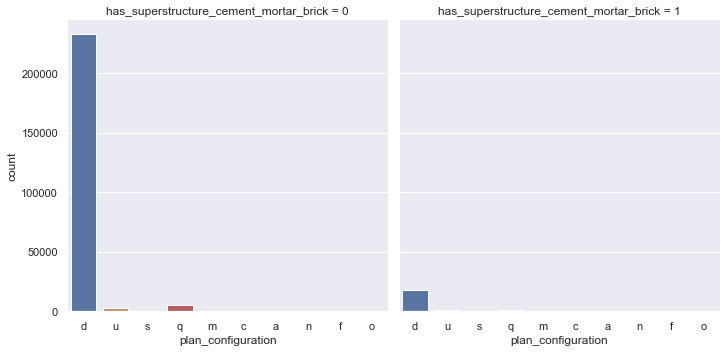

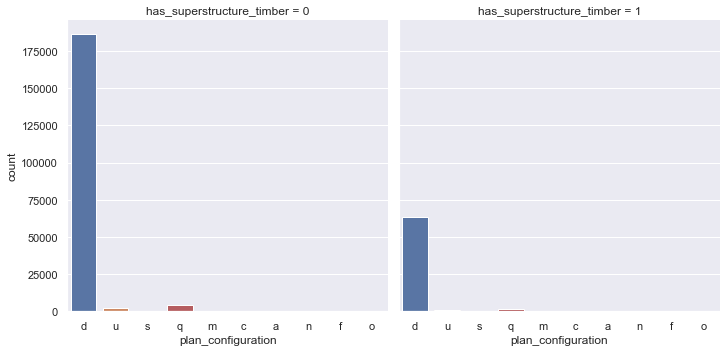

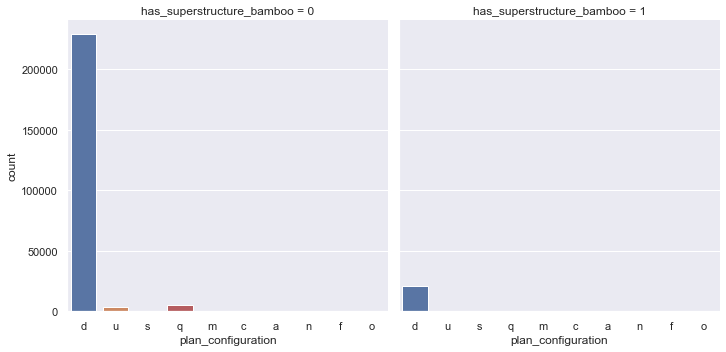

In [105]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_cement_mortar_brick")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_timber")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_bamboo")

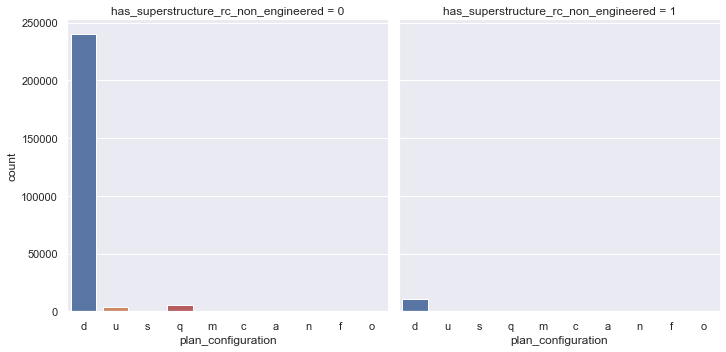

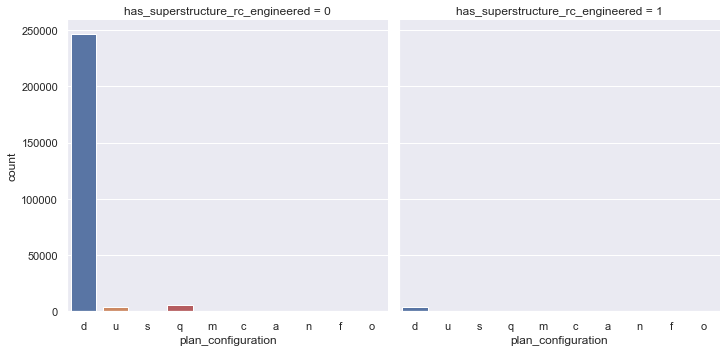

In [106]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_rc_non_engineered")
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_rc_engineered")

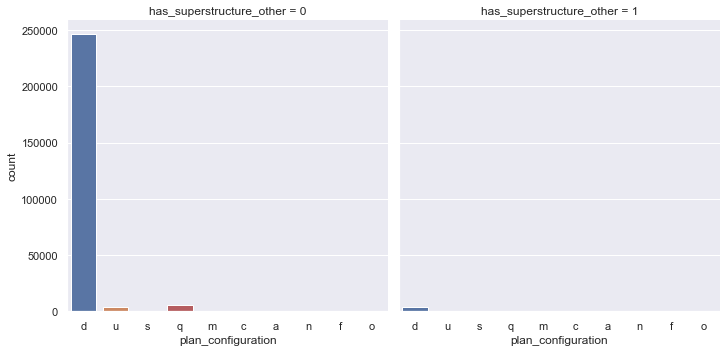

In [107]:
sb.catplot(x="plan_configuration",  data=combined_data,kind = 'count',col = "has_superstructure_other")

# Try predict why plan config d has a problem

In [29]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [30]:
# Response
damage_gradeDF= dPlanDf["damage_grade"]  

In [31]:
# Predictor
predictors = dPlanDf.drop(['damage_grade','plan_configuration','building_id'], axis=1)    
processed_predictors = pd.get_dummies(data=predictors, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(processed_predictors, damage_gradeDF, test_size = 0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Prediction with:"," all variables\n")

# Check the Goodness of Fit (on train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Prediction with:  all variables

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.839015880474065
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6916924922523243


In [32]:
# Predictor
predictors = dPlanDf.drop(['damage_grade','plan_configuration','building_id','age'], axis=1)    
processed_predictors = pd.get_dummies(data=predictors, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(processed_predictors, damage_gradeDF, test_size = 0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Prediction without:\t\t", 'age',"variables\n")

# Check the Goodness of Fit (on train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Prediction without:		 age variables

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.826144548803591
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6994501649505148


In [33]:
# Predictor
predictors = dPlanDf.drop(['damage_grade','plan_configuration','building_id','age',
                          'geo_level_1_id','geo_level_2_id','geo_level_3_id'], axis=1)    
processed_predictors = pd.get_dummies(data=predictors, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(processed_predictors, damage_gradeDF, test_size = 0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Prediction without:\t\t", 'age','geo_level_1_id','geo_level_2_id','geo_level_3_id',"variables\n")

# Check the Goodness of Fit (on train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Prediction without:		 age geo_level_1_id geo_level_2_id geo_level_3_id variables

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6746427268228555
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5920223932820154


In [62]:
# Predictor
predictors = dPlanDf.drop(['damage_grade','plan_configuration','building_id','age',
                          'geo_level_3_id'], axis=1)    
processed_predictors = pd.get_dummies(data=predictors, drop_first=True)

print("Prediction without:\t\t",'age','geo_level_3_id',"variables\n")

X_train, X_test, y_train, y_test = train_test_split(processed_predictors, damage_gradeDF, test_size = 0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Prediction without:		 age geo_level_3_id variables

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8120685604602689
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6932320303908828


In [65]:
# Predictor
predictors = dPlanDf.drop(['damage_grade','plan_configuration','building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id',
                          'count_families'], axis=1)    
processed_predictors = pd.get_dummies(data=predictors, drop_first=True)

print("Prediction without:\t\t",'age','count_families',"variables\n")

X_train, X_test, y_train, y_test = train_test_split(processed_predictors, damage_gradeDF, test_size = 0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Prediction without:		 age count_families variables

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6877339958111938
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5874637608717385


In [71]:
damage_gradeDF= combined_data["damage_grade"]  

In [72]:
# Predictor
predictors = combined_data.drop(['damage_grade','plan_configuration','building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id',
                          'count_families'], axis=1)    
processed_predictors = pd.get_dummies(data=predictors, drop_first=True)

print("Prediction without:\t\t",'age','count_families',"variables\n")

X_train, X_test, y_train, y_test = train_test_split(processed_predictors, damage_gradeDF, test_size = 0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Prediction without:		 age count_families variables

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6886032233307752
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5875175073386927


In [66]:
damage_gradeDF= combined_data["damage_grade"]  

In [70]:
# Predictor
predictors = combined_data.drop(['damage_grade','building_id'], axis=1)    
processed_predictors = pd.get_dummies(data=predictors, drop_first=True)

print("Prediction without:\t\t",'age','count_families',"variables\n")

X_train, X_test, y_train, y_test = train_test_split(processed_predictors, damage_gradeDF, test_size = 0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Prediction without:		 age count_families variables

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8441768994627782
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.694345849081944
